# Cumulative Antarctic SMB

Author: Ziqi Yin

Last edited: Jul 28, 2025

## Description

- Simulation: MT19; CESM2-LE; CESM2-LEcmip6; CESM2-LE*; CESM2-AAER; CESM2-GHG; CESM2-BMB; CESM2-EE; CESM2-TPACE
    - MT19: Reconstruction of Medley and Thomas, 2019
    - CESM2-LE: Large Ensemble (LE) using the 50 members that have smoothed biomass burning
    - CESM2-LEcmip6: Large Ensemble (LE) using the 50 members that have original CMIP6 biomass burning aerosols
    - CESM2-LE*: 10 members of CESM2-LEcmip6 with same initialization years as TPACE
    - CESM2-AAER, GHG, BMB, EE: Single-Forcing large ensembles 4x (SFLE): GHG, AAER, BMB, EE (“everything else” inc. ozone and natural) 15-20 members each
    - CESM2-TPACE: sync the model to evolution of observed internal variability in the tropical Pacific
- Period: Base period is 1000-1451 of the piControl period (same for every run), and 1801-1900 of MT2019; accumulated relative to this base over 1901-2000 for the grounded AIS; box plot indicating ensemble spread of cumulative mass at the year 2000 for each of the ensembles

In [1]:
# Load Libraries
import numpy as np
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature
from cartopy.util import add_cyclic_point
import cartopy.util as util
import xarray as xr
import pandas as pd
from matplotlib.gridspec import GridSpec
from matplotlib.ticker import AutoMinorLocator, MultipleLocator

ERROR 1: PROJ: proj_create_from_database: Open of /glade/work/ziqiyin/conda-envs/my-npl-202306a/share/proj failed


## Read data

In [2]:
## SMB variables
path = '/glade/work/dschneid/zaria_snow/'

#MT19 (1801-2000)
fn_SMB_MT = 'merra_medley_regrid.nc'
SMB_MT = xr.open_dataset(path+fn_SMB_MT).smb
lat_MT = np.array(SMB_MT.lat)
lon_MT = np.array(SMB_MT.lon)

#CESM2-LE (50 members, 1850-2100)
path = '/glade/campaign/cgd/cas/dschneid/SMB_variables_CESM2/large_ensemble_CESM2/'

fn_RAIN_LE = 'b.e21.BHISTsmbb.f09_g17.LE2.EM1-50.clm2.h0.RAIN.185001-210012.nc'
RAIN_LE = xr.open_dataset(path+fn_RAIN_LE).RAIN #[mm/s]
fn_SNOW_LE = 'b.e21.BHISTsmbb.f09_g17.LE2.EM1-50.clm2.h0.SNOW.185001-210012.nc'
SNOW_LE = xr.open_dataset(path+fn_SNOW_LE).SNOW
fn_QSOIL_LE = 'b.e21.BHISTsmbb.f09_g17.LE2.EM1-50.clm2.h0.QSOIL.185001-210012.nc'
QSOIL_LE = xr.open_dataset(path+fn_QSOIL_LE).QSOIL
fn_QRUNOFF_LE = 'b.e21.BHISTsmbb.f09_g17.LE2.EM1-50.clm2.h0.QRUNOFF.185001-210012.nc'
QRUNOFF_LE = xr.open_dataset(path+fn_QRUNOFF_LE).QRUNOFF
SMB_LE = RAIN_LE + SNOW_LE - QSOIL_LE - QRUNOFF_LE
lat = np.array(RAIN_LE.lat)
lon = np.array(RAIN_LE.lon)

#CESM2-LE (10 members, 1850-2100, to compare with TPACE)
path = '/glade/campaign/cgd/cas/dschneid/SMB_variables_CESM2/large_ensemble_CESM2/TPACE_subset/'

fn_RAIN_LE10 = 'b.e21.BHISTcmip6.f09_g17.LE2-EM1-10.clm2.h0.RAIN.185001-210012.nc'
RAIN_LE10 = xr.open_dataset(path+fn_RAIN_LE10).RAIN #[mm/s]
fn_SNOW_LE10 = 'b.e21.BHISTcmip6.f09_g17.LE2-EM1-10.clm2.h0.SNOW.185001-210012.nc'
SNOW_LE10 = xr.open_dataset(path+fn_SNOW_LE10).SNOW
fn_QSOIL_LE10 = 'b.e21.BHISTcmip6.f09_g17.LE2-EM1-10.clm2.h0.QSOIL.185001-210012.nc'
QSOIL_LE10 = xr.open_dataset(path+fn_QSOIL_LE10).QSOIL
fn_QRUNOFF_LE10 = 'b.e21.BHISTcmip6.f09_g17.LE2-EM1-10.clm2.h0.QRUNOFF.185001-210012.nc'
QRUNOFF_LE10 = xr.open_dataset(path+fn_QRUNOFF_LE10).QRUNOFF
SMB_LE10 = RAIN_LE10 + SNOW_LE10 - QSOIL_LE10 - QRUNOFF_LE10

#CESM2-LE-cmip6 (50 cmip6 members, 1850-2100)
path = '/glade/campaign/cgd/cas/dschneid/SMB_variables_CESM2/large_ensemble_CESM2/CMIP6_subset/'

fn_RAIN_LEcmip6 = 'b.e21.BHISTcmip6.f09_g17.LE2.EM1-50.clm2.h0.RAIN.185001-210012.nc'
RAIN_LEcmip6 = xr.open_dataset(path+fn_RAIN_LEcmip6).RAIN #[mm/s]
fn_SNOW_LEcmip6 = 'b.e21.BHISTcmip6.f09_g17.LE2.EM1-50.clm2.h0.SNOW.185001-210012.nc'
SNOW_LEcmip6 = xr.open_dataset(path+fn_SNOW_LEcmip6).SNOW
fn_QSOIL_LEcmip6 = 'b.e21.BHISTcmip6.f09_g17.LE2.EM1-50.clm2.h0.QSOIL.185001-210012.nc'
QSOIL_LEcmip6 = xr.open_dataset(path+fn_QSOIL_LEcmip6).QSOIL
fn_QRUNOFF_LEcmip6 = 'b.e21.BHISTcmip6.f09_g17.LE2.EM1-50.clm2.h0.QRUNOFF.185001-210012.nc'
QRUNOFF_LEcmip6 = xr.open_dataset(path+fn_QRUNOFF_LEcmip6).QRUNOFF
SMB_LEcmip6 = RAIN_LEcmip6 + SNOW_LEcmip6 - QSOIL_LEcmip6 - QRUNOFF_LEcmip6

#CESM2-CMIP6 historical (10 members, 1850-2014)
path = '/glade/campaign/cgd/cas/dschneid/SMB_variables_CESM2/historical-CMIP6/'

fn_RAIN_CMIP6 = 'b.e21.BHIST.f09_g17.CMIP6-historical.EM1-10.clm2.h0.RAIN.185001-201412.nc'
RAIN_CMIP6 = xr.open_dataset(path+fn_RAIN_CMIP6).RAIN #[mm/s]
fn_SNOW_CMIP6 = 'b.e21.BHIST.f09_g17.CMIP6-historical.EM1-10.clm2.h0.SNOW.185001-201412.nc'
SNOW_CMIP6 = xr.open_dataset(path+fn_SNOW_CMIP6).SNOW
fn_QSOIL_CMIP6 = 'b.e21.BHIST.f09_g17.CMIP6-historical.EM1-10.clm2.h0.QSOIL.185001-201412.nc'
QSOIL_CMIP6 = xr.open_dataset(path+fn_QSOIL_CMIP6).QSOIL
fn_QRUNOFF_CMIP6 = 'b.e21.BHIST.f09_g17.CMIP6-historical.EM1-10.clm2.h0.QRUNOFF.185001-201412.nc'
QRUNOFF_CMIP6 = xr.open_dataset(path+fn_QRUNOFF_CMIP6).QRUNOFF
SMB_CMIP6 = RAIN_CMIP6 + SNOW_CMIP6 - QSOIL_CMIP6 - QRUNOFF_CMIP6

#CESM2-AAER (20 members, 1850-2050)
path = '/glade/campaign/cgd/cas/dschneid/SMB_variables_CESM2/single_forcing_AAER/'

fn_RAIN_AAER = 'b.e21.B1850cmip6.f09_g17.CESM2-SF-AAER.EM1-20.clm2.h0.RAIN.185001-205012.nc'
RAIN_AAER = xr.open_dataset(path+fn_RAIN_AAER).RAIN
fn_SNOW_AAER = 'b.e21.B1850cmip6.f09_g17.CESM2-SF-AAER.EM1-20.clm2.h0.SNOW.185001-205012.nc'
SNOW_AAER = xr.open_dataset(path+fn_SNOW_AAER).SNOW
fn_QSOIL_AAER = 'b.e21.B1850cmip6.f09_g17.CESM2-SF-AAER.EM1-20.clm2.h0.QSOIL.185001-205012.nc'
QSOIL_AAER = xr.open_dataset(path+fn_QSOIL_AAER).QSOIL
fn_QRUNOFF_AAER = 'b.e21.B1850cmip6.f09_g17.CESM2-SF-AAER.EM1-20.clm2.h0.QRUNOFF.185001-205012.nc'
QRUNOFF_AAER = xr.open_dataset(path+fn_QRUNOFF_AAER).QRUNOFF
SMB_AAER = RAIN_AAER + SNOW_AAER - QSOIL_AAER - QRUNOFF_AAER

#CESM2-AAER (15 members, 1850-2050, to be consistent with CESM2-GHG)
path = '/glade/campaign/cgd/cas/dschneid/SMB_variables_CESM2/single_forcing_AAER/'

fn_RAIN_AAER15 = 'b.e21.B1850cmip6.f09_g17.CESM2-SF-AAER.EM1-15.clm2.h0.RAIN.185001-205012.nc'
RAIN_AAER15 = xr.open_dataset(path+fn_RAIN_AAER15).RAIN
fn_SNOW_AAER15 = 'b.e21.B1850cmip6.f09_g17.CESM2-SF-AAER.EM1-15.clm2.h0.SNOW.185001-205012.nc'
SNOW_AAER15 = xr.open_dataset(path+fn_SNOW_AAER15).SNOW
fn_QSOIL_AAER15 = 'b.e21.B1850cmip6.f09_g17.CESM2-SF-AAER.EM1-15.clm2.h0.QSOIL.185001-205012.nc'
QSOIL_AAER15 = xr.open_dataset(path+fn_QSOIL_AAER15).QSOIL
fn_QRUNOFF_AAER15 = 'b.e21.B1850cmip6.f09_g17.CESM2-SF-AAER.EM1-15.clm2.h0.QRUNOFF.185001-205012.nc'
QRUNOFF_AAER15 = xr.open_dataset(path+fn_QRUNOFF_AAER15).QRUNOFF
SMB_AAER15 = RAIN_AAER15 + SNOW_AAER15 - QSOIL_AAER15 - QRUNOFF_AAER15

#CESM2-GHG (15 members, 1850-2050)
path = '/glade/campaign/cgd/cas/dschneid/SMB_variables_CESM2/single_forcing_GHG/'

fn_RAIN_GHG = 'b.e21.B1850cmip6.f09_g17.CESM2-SF-GHG.EM1-15.clm2.h0.RAIN.185001-205012.nc'
RAIN_GHG = xr.open_dataset(path+fn_RAIN_GHG).RAIN
fn_SNOW_GHG = 'b.e21.B1850cmip6.f09_g17.CESM2-SF-GHG.EM1-15.clm2.h0.SNOW.185001-205012.nc'
SNOW_GHG = xr.open_dataset(path+fn_SNOW_GHG).SNOW
fn_QSOIL_GHG = 'b.e21.B1850cmip6.f09_g17.CESM2-SF-GHG.EM1-15.clm2.h0.QSOIL.185001-205012.nc'
QSOIL_GHG = xr.open_dataset(path+fn_QSOIL_GHG).QSOIL
fn_QRUNOFF_GHG = 'b.e21.B1850cmip6.f09_g17.CESM2-SF-GHG.EM1-15.clm2.h0.QRUNOFF.185001-205012.nc'
QRUNOFF_GHG = xr.open_dataset(path+fn_QRUNOFF_GHG).QRUNOFF
SMB_GHG = RAIN_GHG + SNOW_GHG - QSOIL_GHG - QRUNOFF_GHG

#CESM2-BMB (15 members, 1850-2050)
path = '/glade/campaign/cgd/cas/dschneid/SMB_variables_CESM2/single_forcing_BMB/'

fn_RAIN_BMB = 'b.e21.B1850cmip6.f09_g17.CESM2-SF-BMB.EM1-15.clm2.h0.RAIN.185001-205012.nc'
RAIN_BMB = xr.open_dataset(path+fn_RAIN_BMB).RAIN
fn_SNOW_BMB = 'b.e21.B1850cmip6.f09_g17.CESM2-SF-BMB.EM1-15.clm2.h0.SNOW.185001-205012.nc'
SNOW_BMB = xr.open_dataset(path+fn_SNOW_BMB).SNOW
fn_QSOIL_BMB = 'b.e21.B1850cmip6.f09_g17.CESM2-SF-BMB.EM1-15.clm2.h0.QSOIL.185001-205012.nc'
QSOIL_BMB = xr.open_dataset(path+fn_QSOIL_BMB).QSOIL
fn_QRUNOFF_BMB = 'b.e21.B1850cmip6.f09_g17.CESM2-SF-BMB.EM1-15.clm2.h0.QRUNOFF.185001-205012.nc'
QRUNOFF_BMB = xr.open_dataset(path+fn_QRUNOFF_BMB).QRUNOFF
SMB_BMB = RAIN_BMB + SNOW_BMB - QSOIL_BMB - QRUNOFF_BMB

#CESM2-EE (15 members, 1850-2050)
path = '/glade/campaign/cgd/cas/dschneid/SMB_variables_CESM2/single_forcing_EE/'

fn_RAIN_EE = 'b.e21.B1850cmip6.f09_g17.CESM2-SF-EE.EM1-15.clm2.h0.RAIN.185001-205012.nc'
RAIN_EE = xr.open_dataset(path+fn_RAIN_EE).RAIN
fn_SNOW_EE = 'b.e21.B1850cmip6.f09_g17.CESM2-SF-EE.EM1-15.clm2.h0.SNOW.185001-205012.nc'
SNOW_EE = xr.open_dataset(path+fn_SNOW_EE).SNOW
fn_QSOIL_EE = 'b.e21.B1850cmip6.f09_g17.CESM2-SF-EE.EM1-15.clm2.h0.QSOIL.185001-205012.nc'
QSOIL_EE = xr.open_dataset(path+fn_QSOIL_EE).QSOIL
fn_QRUNOFF_EE = 'b.e21.B1850cmip6.f09_g17.CESM2-SF-EE.EM1-15.clm2.h0.QRUNOFF.185001-205012.nc'
QRUNOFF_EE = xr.open_dataset(path+fn_QRUNOFF_EE).QRUNOFF
SMB_EE = RAIN_EE + SNOW_EE - QSOIL_EE - QRUNOFF_EE

#CESM2-PI (? members, 1000-2000)
path = '/glade/campaign/cgd/cas/dschneid/SMB_variables_CESM2/pi_control_CESM2/'

fn_RAIN_PI = 'b.e21.B1850.f09_g17.CMIP6-piControl.001.clm2.h0.RAIN.100001-200012.nc'
RAIN_PI = xr.open_dataset(path+fn_RAIN_PI).RAIN.sel(time=slice("1000-02-01", "1452-01-31")) #[mm/s]
fn_SNOW_PI = 'b.e21.B1850.f09_g17.CMIP6-piControl.001.clm2.h0.SNOW.100001-200012.nc'
SNOW_PI = xr.open_dataset(path+fn_SNOW_PI).SNOW.sel(time=slice("1000-02-01", "1452-01-31"))
fn_QSOIL_PI = 'b.e21.B1850.f09_g17.CMIP6-piControl.001.clm2.h0.QSOIL.100001-200012.nc'
QSOIL_PI = xr.open_dataset(path+fn_QSOIL_PI).QSOIL.sel(time=slice("1000-02-01", "1452-01-31"))
fn_QRUNOFF_PI = 'b.e21.B1850.f09_g17.CMIP6-piControl.001.clm2.h0.QRUNOFF.100001-200012.nc'
QRUNOFF_PI = xr.open_dataset(path+fn_QRUNOFF_PI).QRUNOFF.sel(time=slice("1000-02-01", "1452-01-31"))
SMB_PI = RAIN_PI + SNOW_PI - QSOIL_PI - QRUNOFF_PI

#CESM2-TPACE (10 members, 1880-2019)
path = '/glade/campaign/cgd/cas/dschneid/SMB_variables_CESM2/tropical_pacific_pacemaker/'

fn_RAIN_TPACE = 'b.e21.BHISTcmip6.f09_g17.pacemaker_pacific.EM1-10.clm2.h0.RAIN.188001-201912.nc'
RAIN_TPACE = xr.open_dataset(path+fn_RAIN_TPACE).RAIN
fn_SNOW_TPACE = 'b.e21.BHISTcmip6.f09_g17.pacemaker_pacific.EM1-10.clm2.h0.SNOW.188001-201912.nc'
SNOW_TPACE = xr.open_dataset(path+fn_SNOW_TPACE).SNOW
fn_QSOIL_TPACE = 'b.e21.BHISTcmip6.f09_g17.pacemaker_pacific.EM1-10.clm2.h0.QSOIL.188001-201912.nc'
QSOIL_TPACE = xr.open_dataset(path+fn_QSOIL_TPACE).QSOIL
fn_QRUNOFF_TPACE = 'b.e21.BHISTcmip6.f09_g17.pacemaker_pacific.EM1-10.clm2.h0.QRUNOFF.188001-201912.nc'
QRUNOFF_TPACE = xr.open_dataset(path+fn_QRUNOFF_TPACE).QRUNOFF
SMB_TPACE = RAIN_TPACE + SNOW_TPACE - QSOIL_TPACE - QRUNOFF_TPACE

In [3]:
## Grid area
Re = 6371.22 * 1e3  # [m]

f09_mask_file3 = "/glade/p/cesmdata/cseg/inputdata/share/domains/domain.lnd.fv0.9x1.25_gx1v7.151020.nc"
f09_area = xr.open_dataset(f09_mask_file3)["area"]  # [Radian2]
f09_area['ni'] = lon
f09_area['nj'] = lat

f09_area_sel = f09_area.sel(nj=slice(-90,-60))

f09_area = f09_area.values * Re**2
f09_area_sel = f09_area_sel.values * Re**2

In [4]:
## Zwally grounded ice sheet land mask (REMOVAL of ice shelves)
path = '/glade/work/dschneid/zaria_snow/'

fn_GROUNDEDMASK = 'AIS_Groundedmask_Zwally_CESMgrid.nc'
GROUNDEDMASK = xr.open_dataset(path+fn_GROUNDEDMASK).Groundedmask

# Select lat range
GROUNDEDMASK_sel = GROUNDEDMASK.sel(lat=slice(-90,-60))

# Rearrange the longitude for CESM2, from [0~360] to [-180~180]
GROUNDEDMASK_sel_lon_new = GROUNDEDMASK_sel.lon.where(GROUNDEDMASK_sel.lon<=180, GROUNDEDMASK_sel.lon-360)
GROUNDEDMASK_sel['lon'] = GROUNDEDMASK_sel_lon_new
GROUNDEDMASK_sel_rearrange = GROUNDEDMASK_sel.sortby(GROUNDEDMASK_sel.lon)
# Note: in the calculation below, GROUNDEDMASK_sel_rearrange also needs to be add with ".values" since its lat values are not exactly the same to those in SMB_MT

In [5]:
## Correct time
dates = pd.date_range("1800-01-01", periods=452*12, freq='ME') # Cannot assign to year 1000 so add 800 years
SMB_PI['time'] = dates

dates = pd.date_range("1850-01-01", periods=251*12, freq='ME')
SMB_LE['time'] = dates
SMB_LE10['time'] = dates
SMB_LEcmip6['time'] = dates

dates = pd.date_range("1850-01-01", periods=165*12, freq='ME')
SMB_CMIP6['time'] = dates

dates = pd.date_range("1850-01-01", periods=201*12, freq='ME')
SMB_AAER['time'] = dates
SMB_AAER15['time'] = dates
SMB_GHG['time'] = dates
SMB_BMB['time'] = dates
SMB_EE['time'] = dates

dates = pd.date_range("1880-01-01", periods=140*12, freq='ME')
SMB_TPACE['time'] = dates

In [6]:
## Select time period
SMB_MT = SMB_MT.sel(year=slice("1801", "2001"))
SMB_LE = SMB_LE.sel(time=slice("1850-01-01", "2050-12-31"))
SMB_LE10 = SMB_LE10.sel(time=slice("1850-01-01", "2050-12-31"))
SMB_LEcmip6 = SMB_LEcmip6.sel(time=slice("1850-01-01", "2050-12-31"))
SMB_AAER = SMB_AAER.sel(time=slice("1850-01-01", "2050-12-31"))
SMB_AAER15 = SMB_AAER15.sel(time=slice("1850-01-01", "2050-12-31"))
SMB_GHG = SMB_GHG.sel(time=slice("1850-01-01", "2050-12-31"))
SMB_BMB = SMB_BMB.sel(time=slice("1850-01-01", "2050-12-31"))
SMB_EE = SMB_EE.sel(time=slice("1850-01-01", "2050-12-31"))

In [7]:
## Calculate Global Mean Sea Level Rise
#rho_ice = 910. #rhoi
rho_seawater = 1028. #rhoo

fn = '/glade/campaign/collections/cmip/CMIP6/timeseries-cmip6/b.e21.B1850G.f09_g17_gl4.CMIP6-1pctCO2to4x-withism.001/lnd/proc/tseries/month_1/b.e21.B1850G.f09_g17_gl4.CMIP6-1pctCO2to4x-withism.001.clm2.h0.RAIN.000101-005012.nc'
f09_land_frac = xr.open_dataset(fn)['landfrac'] #fraction of grid cell that is active

f09_ocn_area = np.sum(f09_area) - (f09_area * f09_land_frac).sum(dim=['lat','lon']).values #m2

In [8]:
print(f09_ocn_area/1e12) #[1/mm]
print((f09_ocn_area*rho_seawater)/1e15) #[1/mm]

360.652431540058
370.7506996231796


## Calculate

### Base period

In [9]:
## Calculate SMB integrated over the grounded ice sheet
# Base period 1801-1900
SMB_MT_base_int_yearly = (SMB_MT.sel(year=slice("1801", "1901")) * GROUNDEDMASK_sel_rearrange.values * f09_area_sel).sum(dim=['lon','lat']) /1e12 #[mm/yr] to [Gt/yr]
SMB_MT_base_int_yearly_mean = SMB_MT_base_int_yearly.mean(dim='year')

# Base period 1000-1451
SMB_PI_base_monthly = SMB_PI.sel(time=slice("1800-01-01", "2251-12-31")) #[mm/s]
SMB_PI_base_int_monthly = (SMB_PI_base_monthly * GROUNDEDMASK.values * f09_area * SMB_PI_base_monthly.time.dt.days_in_month * (24*3600)).sum(dim=['lon','lat']) /1e12 #[mm/s] to [mm/month] to [Gt/month]
SMB_PI_base_int_yearly = SMB_PI_base_int_monthly.groupby(SMB_PI_base_int_monthly.time.dt.year).sum() #[Gt/yr]
SMB_PI_base_int_yearly_mean = SMB_PI_base_int_yearly.mean(dim='year')

1927.4065648235387
2012.9047553807443


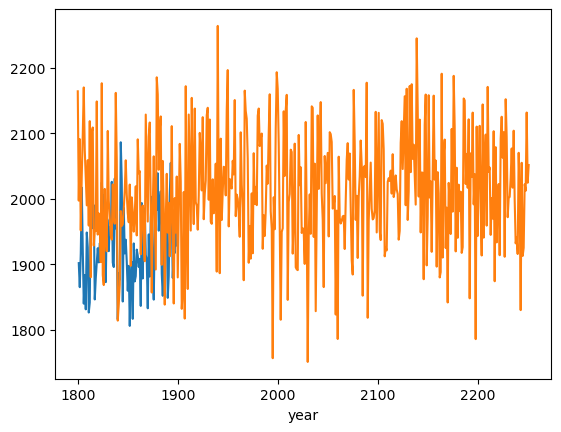

In [10]:
SMB_MT_base_int_yearly.plot();
SMB_PI_base_int_yearly.plot();
print(SMB_MT_base_int_yearly_mean.values)
print(SMB_PI_base_int_yearly_mean.values)

### 1901-2025

In [11]:
## Calculate SMB integrated over the grounded ice sheet
# Plot period 1901-2000/2025
SMB_MT_int_yearly = (SMB_MT.sel(year=slice("1901", "2001")) * GROUNDEDMASK_sel_rearrange.values * f09_area_sel).sum(dim=['lon','lat']) /1e12 #[mm/yr] to [Gt/yr]

SMB_LE_monthly = SMB_LE.sel(time=slice("1901-01-01", "2025-12-31")) #[mm/s]
SMB_LE_int_monthly = (SMB_LE_monthly * GROUNDEDMASK.values * f09_area * SMB_LE_monthly.time.dt.days_in_month * (24*3600)).sum(dim=['lon','lat']) /1e12 #[mm/s] to [mm/month] to [Gt/month]
SMB_LE_int_yearly = SMB_LE_int_monthly.groupby(SMB_LE_int_monthly.time.dt.year).sum() #[Gt/yr]

SMB_LE10_monthly = SMB_LE10.sel(time=slice("1901-01-01", "2025-12-31")) #[mm/s]
SMB_LE10_int_monthly = (SMB_LE10_monthly * GROUNDEDMASK.values * f09_area * SMB_LE10_monthly.time.dt.days_in_month * (24*3600)).sum(dim=['lon','lat']) /1e12 #[mm/s] to [mm/month] to [Gt/month]
SMB_LE10_int_yearly = SMB_LE10_int_monthly.groupby(SMB_LE10_int_monthly.time.dt.year).sum() #[Gt/yr]

SMB_LEcmip6_monthly = SMB_LEcmip6.sel(time=slice("1901-01-01", "2025-12-31")) #[mm/s]
SMB_LEcmip6_int_monthly = (SMB_LEcmip6_monthly * GROUNDEDMASK.values * f09_area * SMB_LEcmip6_monthly.time.dt.days_in_month * (24*3600)).sum(dim=['lon','lat']) /1e12 #[mm/s] to [mm/month] to [Gt/month]
SMB_LEcmip6_int_yearly = SMB_LEcmip6_int_monthly.groupby(SMB_LEcmip6_int_monthly.time.dt.year).sum() #[Gt/yr]

SMB_CMIP6_monthly = SMB_CMIP6.sel(time=slice("1901-01-01", "2014-12-31")) #[mm/s]
SMB_CMIP6_int_monthly = (SMB_CMIP6_monthly * GROUNDEDMASK.values * f09_area * SMB_CMIP6_monthly.time.dt.days_in_month * (24*3600)).sum(dim=['lon','lat']) /1e12 #[mm/s] to [mm/month] to [Gt/month]
SMB_CMIP6_int_yearly = SMB_CMIP6_int_monthly.groupby(SMB_CMIP6_int_monthly.time.dt.year).sum() #[Gt/yr]

SMB_AAER_monthly = SMB_AAER.sel(time=slice("1901-01-01", "2025-12-31")) #[mm/s]
SMB_AAER_int_monthly = (SMB_AAER_monthly * GROUNDEDMASK.values * f09_area * SMB_AAER_monthly.time.dt.days_in_month * (24*3600)).sum(dim=['lon','lat']) /1e12 #[mm/s] to [mm/month] to [Gt/month]
SMB_AAER_int_yearly = SMB_AAER_int_monthly.groupby(SMB_AAER_int_monthly.time.dt.year).sum() #[Gt/yr]

SMB_AAER15_monthly = SMB_AAER15.sel(time=slice("1901-01-01", "2025-12-31")) #[mm/s]
SMB_AAER15_int_monthly = (SMB_AAER15_monthly * GROUNDEDMASK.values * f09_area * SMB_AAER15_monthly.time.dt.days_in_month * (24*3600)).sum(dim=['lon','lat']) /1e12 #[mm/s] to [mm/month] to [Gt/month]
SMB_AAER15_int_yearly = SMB_AAER15_int_monthly.groupby(SMB_AAER15_int_monthly.time.dt.year).sum() #[Gt/yr]

SMB_GHG_monthly = SMB_GHG.sel(time=slice("1901-01-01", "2025-12-31")) #[mm/s]
SMB_GHG_int_monthly = (SMB_GHG_monthly * GROUNDEDMASK.values * f09_area * SMB_GHG_monthly.time.dt.days_in_month * (24*3600)).sum(dim=['lon','lat']) /1e12 #[mm/s] to [mm/month] to [Gt/month]
SMB_GHG_int_yearly = SMB_GHG_int_monthly.groupby(SMB_GHG_int_monthly.time.dt.year).sum() #[Gt/yr]

SMB_BMB_monthly = SMB_BMB.sel(time=slice("1901-01-01", "2025-12-31")) #[mm/s]
SMB_BMB_int_monthly = (SMB_BMB_monthly * GROUNDEDMASK.values * f09_area * SMB_BMB_monthly.time.dt.days_in_month * (24*3600)).sum(dim=['lon','lat']) /1e12 #[mm/s] to [mm/month] to [Gt/month]
SMB_BMB_int_yearly = SMB_BMB_int_monthly.groupby(SMB_BMB_int_monthly.time.dt.year).sum() #[Gt/yr]

SMB_EE_monthly = SMB_EE.sel(time=slice("1901-01-01", "2025-12-31")) #[mm/s]
SMB_EE_int_monthly = (SMB_EE_monthly * GROUNDEDMASK.values * f09_area * SMB_EE_monthly.time.dt.days_in_month * (24*3600)).sum(dim=['lon','lat']) /1e12 #[mm/s] to [mm/month] to [Gt/month]
SMB_EE_int_yearly = SMB_EE_int_monthly.groupby(SMB_EE_int_monthly.time.dt.year).sum() #[Gt/yr]

SMB_TPACE_monthly = SMB_TPACE.sel(time=slice("1901-01-01", "2019-12-31")) #[mm/s]
SMB_TPACE_int_monthly = (SMB_TPACE_monthly * GROUNDEDMASK.values * f09_area * SMB_TPACE_monthly.time.dt.days_in_month * (24*3600)).sum(dim=['lon','lat']) /1e12 #[mm/s] to [mm/month] to [Gt/month]
SMB_TPACE_int_yearly = SMB_TPACE_int_monthly.groupby(SMB_TPACE_int_monthly.time.dt.year).sum() #[Gt/yr]

In [12]:
## Calculate cumulative SMB relative to the base period mean
SMB_MT_int_yearly_cum = (SMB_MT_int_yearly - SMB_MT_base_int_yearly_mean).cumsum(dim='year')
SMB_LE_int_yearly_cum = (SMB_LE_int_yearly - SMB_PI_base_int_yearly_mean).cumsum(dim='year')
SMB_LE10_int_yearly_cum = (SMB_LE10_int_yearly - SMB_PI_base_int_yearly_mean).cumsum(dim='year')
SMB_LEcmip6_int_yearly_cum = (SMB_LEcmip6_int_yearly - SMB_PI_base_int_yearly_mean).cumsum(dim='year')
SMB_CMIP6_int_yearly_cum = (SMB_CMIP6_int_yearly - SMB_PI_base_int_yearly_mean).cumsum(dim='year')
SMB_AAER_int_yearly_cum = (SMB_AAER_int_yearly - SMB_PI_base_int_yearly_mean).cumsum(dim='year')
SMB_AAER15_int_yearly_cum = (SMB_AAER15_int_yearly - SMB_PI_base_int_yearly_mean).cumsum(dim='year')
SMB_GHG_int_yearly_cum = (SMB_GHG_int_yearly - SMB_PI_base_int_yearly_mean).cumsum(dim='year')
SMB_BMB_int_yearly_cum = (SMB_BMB_int_yearly - SMB_PI_base_int_yearly_mean).cumsum(dim='year')
SMB_EE_int_yearly_cum = (SMB_EE_int_yearly - SMB_PI_base_int_yearly_mean).cumsum(dim='year')
SMB_TPACE_int_yearly_cum = (SMB_TPACE_int_yearly - SMB_PI_base_int_yearly_mean).cumsum(dim='year')

In [13]:
## Values
# base period 1850-1900
print('By 2000')
print('MT2019: ', SMB_MT_int_yearly_cum.sel(year=2000).values)
print('CESM2-LE: ', SMB_LE_int_yearly_cum.sel(year=2000).values)
print('CESM2-LE10: ', SMB_LE10_int_yearly_cum.sel(year=2000).values)
print('CESM2-LEcmip6: ', SMB_LEcmip6_int_yearly_cum.sel(year=2000).values)
print('CESM2-CMIP6: ', SMB_CMIP6_int_yearly_cum.sel(year=2000).values)
print('CESM2-GHG: ', SMB_GHG_int_yearly_cum.sel(year=2000).values)
print('CESM2-AAER: ', SMB_AAER_int_yearly_cum.sel(year=2000).values)
print('CESM2-GHG+CESM2-AAER: ', SMB_GHG_int_yearly_cum.sel(year=2000).values+SMB_AAER_int_yearly_cum.sel(year=2000).values)
print('CESM2-GHG+CESM2-AAER15: ', SMB_GHG_int_yearly_cum.sel(year=2000).values+SMB_AAER15_int_yearly_cum.sel(year=2000).values)
print('CESM2-BMB: ', SMB_BMB_int_yearly_cum.sel(year=2000).values)
print('CESM2-EE: ', SMB_EE_int_yearly_cum.sel(year=2000).values)
print('CESM2-TPACE: ', SMB_TPACE_int_yearly_cum.sel(year=2000).values)
print('CESM2-TPACE-CESM2-LE10: ', SMB_TPACE_int_yearly_cum.sel(year=2000).values-SMB_LE10_int_yearly_cum.sel(year=2000).values)

By 2000
MT2019:  3824.385510369673
CESM2-LE:  6078.784352997741
CESM2-LE10:  6478.928871448671
CESM2-LEcmip6:  6434.017215945746
CESM2-CMIP6:  4275.909167902626
CESM2-GHG:  7483.05307633544
CESM2-AAER:  -3156.566520297838
CESM2-GHG+CESM2-AAER:  4326.486556037602
CESM2-GHG+CESM2-AAER15:  4185.15323283354
CESM2-BMB:  -281.31018359276595
CESM2-EE:  744.4863228585909
CESM2-TPACE:  4167.076200168565
CESM2-TPACE-CESM2-LE10:  -2311.852671280106


## Add ensemble spread

In [14]:
## CESM2-GHG
SMB_GHG_ensemble_int_yearly = xr.open_dataset('../SMB_GHG_ensemble_int_yearly.nc').SMB 

# Calculate cumulative SMB relative to the base period mean
SMB_GHG_ensemble_int_yearly_cum = np.zeros((15, 2050-1900))

for i in range(15):
    SMB_GHG_ensemble_int_yearly_cum[i,:] = (SMB_GHG_ensemble_int_yearly.sel(num=i+1).sel(year=slice('1901', '2050')) - SMB_PI_base_int_yearly_mean).cumsum(dim='year')

In [15]:
## CESM2-AAER 20 members
SMB_AAER_ensemble_int_yearly = xr.open_dataset('../SMB_AAER_ensemble_int_yearly.nc').SMB 

# Calculate cumulative SMB relative to the base period mean
SMB_AAER_ensemble_int_yearly_cum = np.zeros((20, 2050-1900))

for i in range(20):
    SMB_AAER_ensemble_int_yearly_cum[i,:] = (SMB_AAER_ensemble_int_yearly.sel(num=i+1).sel(year=slice('1901', '2050')) - SMB_PI_base_int_yearly_mean).cumsum(dim='year')

In [16]:
## CESM2-LE
SMB_LE_ensemble_int_yearly = xr.open_dataset('../SMB_LE_ensemble_int_yearly.nc').SMB

# Calculate cumulative SMB relative to the base period mean
SMB_LE_ensemble_int_yearly_cum = np.zeros((50, 2050-1900))

for i in range(50):
    SMB_LE_ensemble_int_yearly_cum[i,:] = (SMB_LE_ensemble_int_yearly.sel(num=i+1).sel(year=slice('1901', '2050')) - SMB_PI_base_int_yearly_mean).cumsum(dim='year')

In [17]:
## CESM2-TPACE
SMB_TPACE_ensemble_int_yearly = xr.open_dataset('../SMB_TPACE_ensemble_int_yearly.nc').SMB 

SMB_TPACE_ensemble_int_yearly_cum = np.zeros((10, 2019-1900))

for i in range(10):
    SMB_TPACE_ensemble_int_yearly_cum[i,:] = (SMB_TPACE_ensemble_int_yearly.sel(num=i+1).sel(year=slice('1901', '2019')) - SMB_PI_base_int_yearly_mean).cumsum(dim='year')

In [18]:
## CESM2-PI, 20 segments
SMB_PI_ensemble_int_yearly = xr.open_dataset('../SMB_PI_ensemble_int_yearly.nc').SMB 

SMB_PI_ensemble_int_yearly_cum = np.zeros((20, 100))

for i in range(20):
    SMB_PI_ensemble_int_yearly_cum[i,:] = (SMB_PI_ensemble_int_yearly.sel(num=i+1) - SMB_PI_base_int_yearly_mean).cumsum(dim='year')

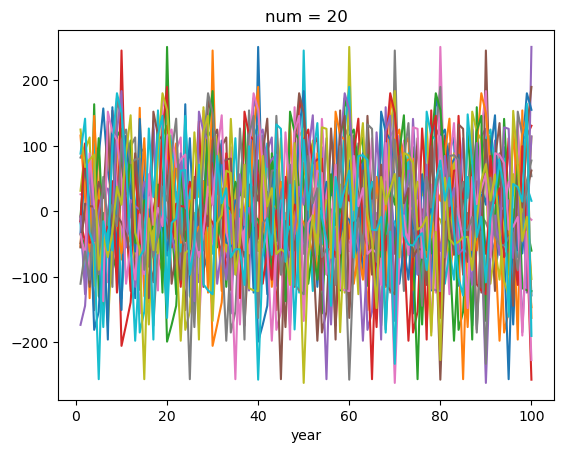

In [19]:
for i in range(20):
    (SMB_PI_ensemble_int_yearly.sel(num=i+1) - SMB_PI_base_int_yearly_mean).plot();

In [20]:
## CESM2-PI, 24 segments
SMB_PI24seg_ensemble_int_yearly = xr.open_dataset('../SMB_PI24seg_ensemble_int_yearly.nc').SMB 

SMB_PI24seg_ensemble_int_yearly_cum = np.zeros((24, 100))

for i in range(24):
    SMB_PI24seg_ensemble_int_yearly_cum[i,:] = (SMB_PI24seg_ensemble_int_yearly.sel(num=i+1) - SMB_PI_base_int_yearly_mean).cumsum(dim='year')

In [21]:
# Mass gain of the 24 century-length segments
print('Mean: ', SMB_PI24seg_ensemble_int_yearly_cum[:,-1].mean())
print('Std: ', SMB_PI24seg_ensemble_int_yearly_cum[:,-1].std())
print('Time series: ', SMB_PI24seg_ensemble_int_yearly_cum[:,-1])

Mean:  -185.81105156872084
Std:  1114.468522200686
Time series:  [-1681.3021611  -2588.25255895 -2348.68634174 -1517.20689563
 -1112.14323583  -359.58317062    37.83096181   481.24655932
    51.64883939   354.37305164  1075.45676533  1561.92380231
  1018.39526555   199.89882962    57.06325484   -43.41275531
  -492.61614225  -906.15890686  -789.85850614  -940.84285724
     7.32307381   725.77822769  1312.99618618  1436.66347651]


In [22]:
## CESM2-BMB
SMB_BMB_ensemble_int_yearly = xr.open_dataset('../SMB_BMB_ensemble_int_yearly.nc').SMB 

# Calculate cumulative SMB relative to the base period mean
SMB_BMB_ensemble_int_yearly_cum = np.zeros((15, 2050-1900))

for i in range(15):
    SMB_BMB_ensemble_int_yearly_cum[i,:] = (SMB_BMB_ensemble_int_yearly.sel(num=i+1).sel(year=slice('1901', '2050')) - SMB_PI_base_int_yearly_mean).cumsum(dim='year')

In [23]:
## CESM2-EE
SMB_EE_ensemble_int_yearly = xr.open_dataset('../SMB_EE_ensemble_int_yearly.nc').SMB 

# Calculate cumulative SMB relative to the base period mean
SMB_EE_ensemble_int_yearly_cum = np.zeros((15, 2050-1900))

for i in range(15):
    SMB_EE_ensemble_int_yearly_cum[i,:] = (SMB_EE_ensemble_int_yearly.sel(num=i+1).sel(year=slice('1901', '2050')) - SMB_PI_base_int_yearly_mean).cumsum(dim='year')

In [24]:
## CESM2-LE 10 members to compare with CESM2-TPACE
SMB_LE10_ensemble_int_yearly = xr.open_dataset('../SMB_LE10_ensemble_int_yearly.nc').SMB

# Calculate cumulative SMB relative to the base period mean
SMB_LE10_ensemble_int_yearly_cum = np.zeros((10, 2050-1900))

for i in range(10):
    SMB_LE10_ensemble_int_yearly_cum[i,:] = (SMB_LE10_ensemble_int_yearly.sel(num=i+1).sel(year=slice('1901', '2050')) - SMB_PI_base_int_yearly_mean).cumsum(dim='year')

In [25]:
## CESM2-LE 50 cmip6 members
SMB_LEcmip6_ensemble_int_yearly = xr.open_dataset('../SMB_LEcmip6_ensemble_int_yearly.nc').SMB

# Calculate cumulative SMB relative to the base period mean
SMB_LEcmip6_ensemble_int_yearly_cum = np.zeros((50, 2050-1900))

for i in range(50):
    SMB_LEcmip6_ensemble_int_yearly_cum[i,:] = (SMB_LEcmip6_ensemble_int_yearly.sel(num=i+1).sel(year=slice('1901', '2050')) - SMB_PI_base_int_yearly_mean).cumsum(dim='year')

In [26]:
## Std values (1901-2000)
print('By 2000')
print('MT2019: ', 2.9 * f09_ocn_area /1e12)
print('CESM2-LE: ', SMB_LE_ensemble_int_yearly_cum[:,99].std())
#print('CESM2-LE10: ', )
print('CESM2-LEcmip6: ', SMB_LEcmip6_ensemble_int_yearly_cum[:,99].std())
#print('CESM2-CMIP6: ', SMB_CMIP6_int_yearly_cum.sel(year=2000).values)
print('CESM2-GHG: ', SMB_GHG_ensemble_int_yearly_cum[:,99].std())
print('CESM2-AAER: ', SMB_AAER_ensemble_int_yearly_cum[:,99].std())
#print('CESM2-GHG+CESM2-AAER: ', SMB_GHG_int_yearly_cum.sel(year=2000).values+SMB_AAER_int_yearly_cum.sel(year=2000).values)
print('CESM2-GHG+CESM2-AAER15: ', SMB_GHG_ensemble_int_yearly_cum[:,99].std()+SMB_AAER_ensemble_int_yearly_cum[:15,99].std())
#print('CESM2-BMB: ', SMB_BMB_int_yearly_cum.sel(year=2000).values)
print('CESM2-EE: ', SMB_EE_ensemble_int_yearly_cum[:,99].std())
print('CESM2-TPACE: ', SMB_TPACE_ensemble_int_yearly_cum[:,99].std())
#print('CESM2-TPACE-CESM2-LE10: ', SMB_TPACE_int_yearly_cum.sel(year=2000).values-SMB_LE10_int_yearly_cum.sel(year=2000).values)

By 2000
MT2019:  1045.8920514661681
CESM2-LE:  1186.26563118246
CESM2-LEcmip6:  1242.1947167860615
CESM2-GHG:  1220.113883151006
CESM2-AAER:  960.3636491696219
CESM2-GHG+CESM2-AAER15:  2230.7158495578033
CESM2-EE:  1293.0756666293896
CESM2-TPACE:  855.4740945010775


#### Save as txt

In [20]:
# Save as txt file for Dave
data_LE = SMB_LE_ensemble_int_yearly_cum[:,99]
data_TPACE = SMB_TPACE_ensemble_int_yearly_cum[:,99]

data_LE_TPACE = np.concatenate([data_LE, data_TPACE], axis=0)

np.savetxt('SMB_cum_1901-2020_PIbase452yr_CESM2-LE_TPACE.txt', data_LE_TPACE)

In [16]:
np.loadtxt('SMB_cum_1901-2020_PIbase452yr_CESM2-LE_TPACE.txt')

array([4363.49521233, 3513.4199993 , 5884.50980947, 5904.77908902,
       6838.91056465, 6484.67486762, 5947.1569035 , 5814.06253927,
       4686.96046326, 5669.94960754, 6438.20048056, 6656.96798083,
       4594.42291537, 3577.9367552 , 5491.9218831 , 6424.23502471,
       4484.40281882, 4828.51550994, 6006.09625694, 7058.06335644,
       7363.78803994, 4189.29758588, 6396.81035476, 5778.4681934 ,
       6245.10632973, 4714.77521572, 6984.3270922 , 6220.46823815,
       5563.39061635, 5999.00151051, 5197.65473644, 7977.76405715,
       8169.39991591, 7198.89662015, 8199.04284911, 7329.71484901,
       6517.46230928, 6278.34505414, 6513.2103949 , 8858.36272282,
       6385.62250951, 5872.72245705, 3824.80888599, 5439.78962877,
       7568.85706065, 7581.92672202, 6125.28115378, 6551.85478577,
       6570.43042487, 5653.95535893, 3846.85765758, 3368.1131795 ,
       5370.95101764, 4513.25225827, 5347.67938845, 4227.70424039,
       2788.73128602, 4211.59497084, 4906.72774388, 3089.15026

In [33]:
# Save as txt file for Dave
data_LEcmip6 = SMB_LEcmip6_ensemble_int_yearly_cum[:,99]

np.savetxt('SMB_cum_1901-2020_PIbase452yr_CESM2-LE-cmip6.txt', data_LEcmip6)

In [36]:
np.loadtxt('SMB_cum_1901-2020_PIbase452yr_CESM2-LE-cmip6.txt')

array([6994.42017616, 5316.76523558, 5272.17716454, 5952.67716631,
       6588.07511177, 7073.3483272 , 6604.23986243, 6234.23336156,
       6875.75642091, 7877.59591152, 5074.64346779, 7454.56943303,
       3804.78097407, 6328.51577733, 8202.48324311, 6182.47121183,
       5849.81782036, 5005.85307069, 4008.26674533, 3293.71747643,
       7165.18574894, 6686.90970754, 5095.05133949, 5730.1150644 ,
       8055.75263206, 5600.17850906, 7369.63917412, 8447.12881974,
       5939.52434816, 5476.07367215, 5803.38599311, 8310.66686206,
       7350.46087448, 4127.34557152, 6142.94865561, 5707.45766165,
       7454.30085558, 5845.22792267, 7189.34448267, 7978.99386673,
       7261.64504785, 7388.75120068, 5889.23261064, 7593.26406428,
       7075.02625097, 4970.16846363, 6968.27883111, 8632.32764163,
       7770.80601253, 6681.26121068])

## Plot

### 1901-2025

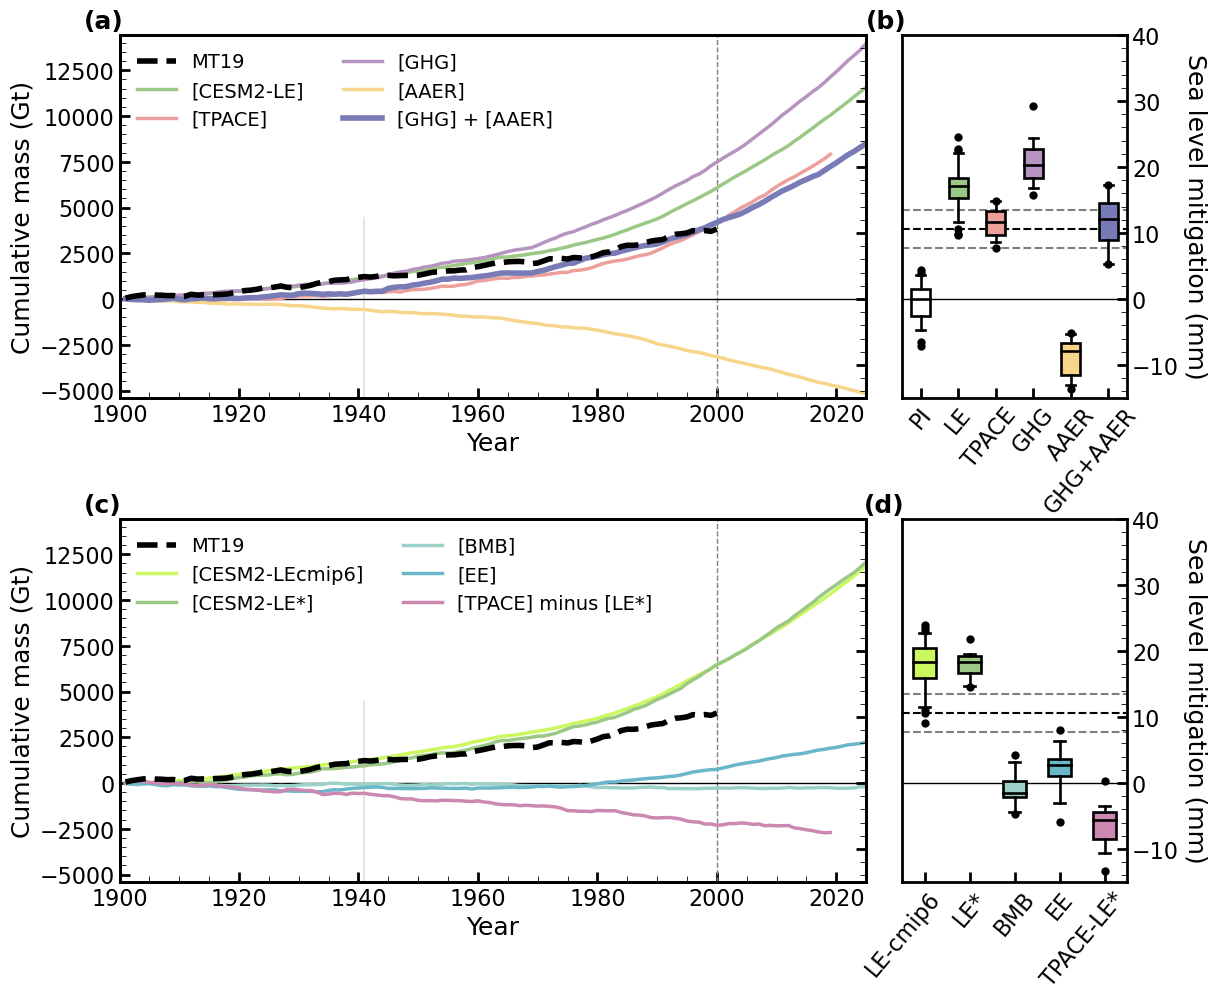

In [31]:
# 
fig = plt.figure(figsize=(13, 11))
gs = GridSpec(11, 12)
plt.rcParams["axes.linewidth"] = 2  # set the value globally

size_tick = 16
size_label = 18
size_legend = 14
size_text = 18
width_line = 2.5
width_box = 1.9

#------------------------------------------------------------------------
# cumulative SMB
ax1 = plt.subplot(gs[0:5,0:9])

plt.axvline(x=1941, ymin=0, ymax=0.5, linestyle="-", color="gray", linewidth=0.3)
plt.axvline(x=2000, linestyle="--", color="gray", linewidth=1)
plt.axhline(y=0, linestyle="-", color="black", linewidth=1)
ax1.plot(SMB_MT_int_yearly_cum.year, SMB_MT_int_yearly_cum, color="black", linestyle="--", linewidth=width_line+1.5, label="MT19", zorder=5)
ax1.plot(SMB_LE_int_yearly_cum.year, SMB_LE_int_yearly_cum, color="#9BC985", linewidth=width_line, label="[CESM2-LE]")
ax1.plot(SMB_TPACE_int_yearly_cum.year, SMB_TPACE_int_yearly_cum, color="#ED9F9B", linewidth=width_line, label="[TPACE]")
ax1.plot(SMB_GHG_int_yearly_cum.year, SMB_GHG_int_yearly_cum, color="#B595BF", linewidth=width_line, label="[GHG]")
ax1.plot(SMB_AAER_int_yearly_cum.year, SMB_AAER_int_yearly_cum, color="#F7D58B", linewidth=width_line, label="[AAER]")
ax1.plot(SMB_GHG_int_yearly_cum.year, (SMB_AAER15_int_yearly_cum+SMB_GHG_int_yearly_cum), color="#797BB7", linewidth=width_line+1.5, label="[GHG] + [AAER]")

ax1.legend(loc="best", frameon=False, prop={"size": size_legend}, ncol=2)

ax1.set_xlim([1900, 2025])
ax1.set_ylim([-15*f09_ocn_area/1e12, 40*f09_ocn_area/1e12])
ax1.set_xlabel("Year", fontsize=size_label)
ax1.set_ylabel("Cumulative mass (Gt)", fontsize=size_label)
ax1.xaxis.set_minor_locator(AutoMinorLocator())
ax1.yaxis.set_minor_locator(AutoMinorLocator())
ax1.tick_params(which="major", length=7, width=2, direction="in")
ax1.tick_params(which="minor", length=4, direction="in")
# ax1.set_yticks([-1000, -500, 0, 500])
ax1.tick_params(labelsize=size_tick)
ax1.text(1894, 14800, '(a)', fontsize=size_text, fontweight='bold')

# SLR contribution
ax2 = ax1.twinx()

ax2.set_ylim([-15, 40])
#ax2.set_ylabel("Sea level offset (mm)", fontsize=size_label)
ax2.yaxis.set_minor_locator(AutoMinorLocator())
ax2.tick_params(which="major", length=7, width=2, direction="in")
ax2.tick_params(which="minor", length=4, direction="in")
ax2.tick_params(labelsize=size_tick, labelcolor='white')

#------------------------------------------------------------------------
# Box plot
ax3 = plt.subplot(gs[0:5,9:12])

data_PI = SMB_PI24seg_ensemble_int_yearly_cum[:,99] *1e12/f09_ocn_area
data_LE = SMB_LE_ensemble_int_yearly_cum[:,99] *1e12/f09_ocn_area
data_GHG = SMB_GHG_ensemble_int_yearly_cum[:,99] *1e12/f09_ocn_area
data_AAER = SMB_AAER_ensemble_int_yearly_cum[:,99] *1e12/f09_ocn_area
data_TPACE = SMB_TPACE_ensemble_int_yearly_cum[:,99] *1e12/f09_ocn_area
data_GHG_AAER = (SMB_GHG_ensemble_int_yearly_cum[:,99] + SMB_AAER_ensemble_int_yearly_cum[:15,99]) *1e12/f09_ocn_area

boxprops = dict(linewidth=width_box)
medianprops = dict(linestyle='-', linewidth=width_box, color='black')
whiskerprops = dict(linewidth=width_box)
capprops = dict(linewidth=width_box)
flierprops = dict(marker='o', markerfacecolor='black', markersize=6, markeredgecolor='none')
plt.axhline(y=0, linestyle="-", color="black", linewidth=1)
plt.axhline(y=SMB_MT_int_yearly_cum.sel(year=2000)*1e12/f09_ocn_area, linestyle="--", color="black", linewidth=1.5)
plt.axhline(y=7.7, linestyle="--", color="gray", linewidth=1.5)#, alpha=0.2)
plt.axhline(y=13.5, linestyle="--", color="gray", linewidth=1.5)#, alpha=0.2)
bplot = ax3.boxplot([data_PI, data_LE, data_TPACE, data_GHG, data_AAER, data_GHG_AAER], whis=[5,95], boxprops=boxprops, medianprops=medianprops, whiskerprops=whiskerprops, capprops=capprops, flierprops=flierprops, patch_artist=True)

# fill with colors
colors = ['white', '#9BC985', "#ED9F9B", '#B595BF', '#F7D58B', "#797BB7"]
for patch, color in zip(bplot['boxes'], colors):
    patch.set_facecolor(color)

ax3.set_ylim([-15, 40])
ax3.yaxis.set_label_position("right")
ax3.set_ylabel("Sea level mitigation (mm)", fontsize=size_label, rotation=-90, labelpad=20)
ax3.set_xticks([1, 2, 3, 4, 5, 6], ['PI', 'LE', '', 'GHG', 'AAER', ''], rotation=50)
ax3.set_xticks([2.83, 5.53], minor=True)
ax3.set_xticklabels(['TPACE', 'GHG+AAER'], minor=True, fontsize=size_tick, rotation=50)
ax3.tick_params(axis='x', which="minor", length=0)

ax3.yaxis.tick_right()
ax3.yaxis.set_minor_locator(AutoMinorLocator())
ax3.tick_params(which="major", length=7, width=2, direction="in")
ax3.tick_params(axis='y', which="minor", length=4, direction="in")
ax3.tick_params(labelsize=size_tick)
ax3.text(-0.46, 14800/f09_ocn_area*1e12, '(b)', fontsize=size_text, fontweight='bold')

#------------------------------------------------------------------------
# cumulative SMB
ax4 = plt.subplot(gs[6:11,0:9])

plt.axvline(x=1941, ymin=0, ymax=0.5, linestyle="-", color="gray", linewidth=0.3)
plt.axvline(x=2000, linestyle="--", color="gray", linewidth=1)
plt.axhline(y=0, linestyle="-", color="black", linewidth=1)
ax4.plot(SMB_MT_int_yearly_cum.year, SMB_MT_int_yearly_cum, color="black", linestyle="--", linewidth=width_line+1.5, label="MT19", zorder=6)
ax4.plot(SMB_LEcmip6_int_yearly_cum.year, SMB_LEcmip6_int_yearly_cum, color="#cbf85f", linewidth=width_line, label="[CESM2-LEcmip6]")
ax4.plot(SMB_LE10_int_yearly_cum.year, SMB_LE10_int_yearly_cum, color="#9BC985", linewidth=width_line, label="[CESM2-LE*]")
ax4.plot(SMB_BMB_int_yearly_cum.year, SMB_BMB_int_yearly_cum, color="#9CD1C8", linewidth=width_line, label="[BMB]")
ax4.plot(SMB_EE_int_yearly_cum.year, SMB_EE_int_yearly_cum, color="#6BB7CA", linewidth=width_line, label="[EE]")
ax4.plot(SMB_TPACE_int_yearly_cum.year, (SMB_TPACE_int_yearly_cum-SMB_LE10_int_yearly_cum), color="#CC88B0", linewidth=width_line, label="[TPACE] minus [LE*]")

ax4.legend(loc="best", frameon=False, prop={"size": size_legend}, ncol=2)

ax4.set_xlim([1900, 2025])
ax4.set_ylim([-15*f09_ocn_area/1e12, 40*f09_ocn_area/1e12])
ax4.set_xlabel("Year", fontsize=size_label)
ax4.set_ylabel("Cumulative mass (Gt)", fontsize=size_label)
ax4.xaxis.set_minor_locator(AutoMinorLocator())
ax4.yaxis.set_minor_locator(AutoMinorLocator())
ax4.tick_params(which="major", length=7, width=2, direction="in")
ax4.tick_params(which="minor", length=4, direction="in")
# ax4.set_yticks([-1000, -500, 0, 500])
ax4.tick_params(labelsize=size_tick)
ax4.text(1894, 14800, '(c)', fontsize=size_text, fontweight='bold')

# SLR contribution
ax5 = ax4.twinx()

ax5.set_ylim([-15, 40])
ax5.set_ylabel("Sea level mitigation (mm)", fontsize=size_label)
ax5.yaxis.set_minor_locator(AutoMinorLocator())
ax5.tick_params(which="major", length=7, width=2, direction="in")
ax5.tick_params(which="minor", length=4, direction="in")
ax5.tick_params(labelsize=size_tick, labelcolor='white')

#------------------------------------------------------------------------
# Box plot
ax6 = plt.subplot(gs[6:11,9:12])

data_LEcmip6 = SMB_LEcmip6_ensemble_int_yearly_cum[:,99] *1e12/f09_ocn_area
data_LE10 = SMB_LE10_ensemble_int_yearly_cum[:,99] *1e12/f09_ocn_area
data_BMB = SMB_BMB_ensemble_int_yearly_cum[:,99] *1e12/f09_ocn_area
data_EE = SMB_EE_ensemble_int_yearly_cum[:,99] *1e12/f09_ocn_area
data_TPACE_LE10 = (SMB_TPACE_ensemble_int_yearly_cum[:,99] - SMB_LE10_ensemble_int_yearly_cum[:,99]) *1e12/f09_ocn_area

boxprops = dict(linewidth=width_box)
medianprops = dict(linestyle='-', linewidth=width_box, color='black')
whiskerprops = dict(linewidth=width_box)
capprops = dict(linewidth=width_box)
flierprops = dict(marker='o', markerfacecolor='black', markersize=6, markeredgecolor='none')
plt.axhline(y=0, linestyle="-", color="black", linewidth=1)
plt.axhline(y=SMB_MT_int_yearly_cum.sel(year=2000)*1e12/f09_ocn_area, linestyle="--", color="black", linewidth=1.5)
plt.axhline(y=7.7, linestyle="--", color="gray", linewidth=1.5)#, alpha=0.2)
plt.axhline(y=13.5, linestyle="--", color="gray", linewidth=1.5)#, alpha=0.2)
bplot = ax6.boxplot([data_LEcmip6, data_LE10, data_BMB, data_EE, data_TPACE_LE10], whis=[5,95], boxprops=boxprops, medianprops=medianprops, whiskerprops=whiskerprops, capprops=capprops, flierprops=flierprops, patch_artist=True)

# fill with colors
colors = ["#cbf85f", "#9BC985", "#9CD1C8", "#6BB7CA", "#CC88B0"]
for patch, color in zip(bplot['boxes'], colors):
    patch.set_facecolor(color)

ax6.set_ylim([-15, 40])
ax6.yaxis.set_label_position("right")
ax6.set_ylabel("Sea level mitigation (mm)", fontsize=size_label, rotation=-90, labelpad=20)
ax6.set_xticks([1, 2, 3, 4, 5], ['', 'LE*', 'BMB', 'EE', ''], rotation=50)
ax6.set_xticks([0.53, 4.53], minor=True)
ax6.set_xticklabels(['LE-cmip6', 'TPACE-LE*'], minor=True, fontsize=size_tick, rotation=50)
ax6.tick_params(axis='x', which="minor", length=0)

ax6.yaxis.tick_right()
ax6.yaxis.set_minor_locator(AutoMinorLocator())
ax6.tick_params(which="major", length=7, width=2, direction="in")
ax6.tick_params(axis='y', which="minor", length=4, direction="in")
ax6.tick_params(labelsize=size_tick)
ax6.text(-0.35, 14800/f09_ocn_area*1e12, '(d)', fontsize=size_text, fontweight='bold')


plt.subplots_adjust(wspace=0.7, hspace=1)
plt.savefig(
    "plot/F1_tseries_box_AIS_cumulative_SMB_1901_2025_basePI2_PI24seg.png",
    dpi=300,
    bbox_inches="tight",
    facecolor="w",
    transparent=False,
)  #

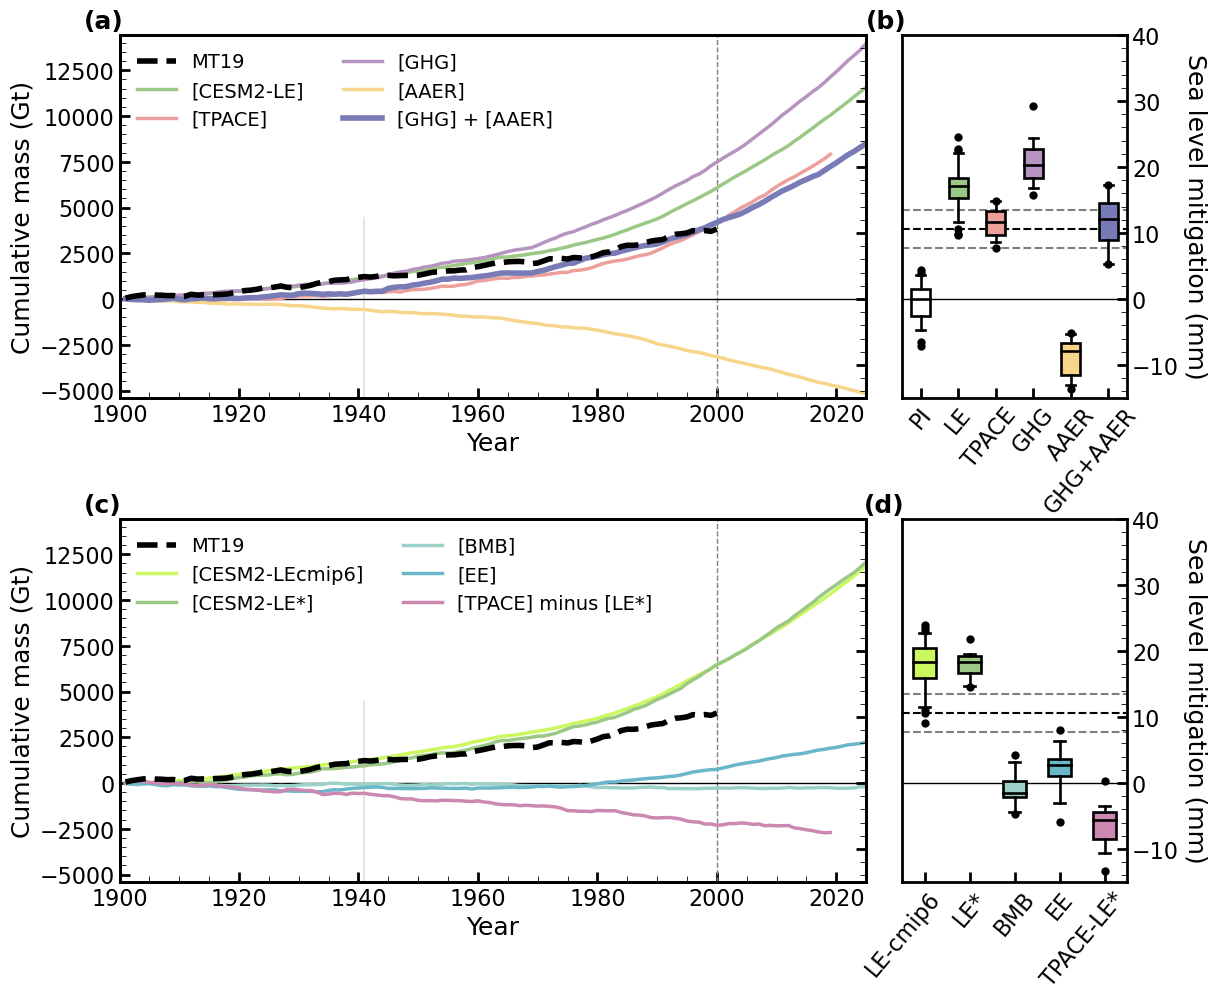

In [32]:
# Save in pdf format
fig = plt.figure(figsize=(13, 11))
gs = GridSpec(11, 12)
plt.rcParams["axes.linewidth"] = 2  # set the value globally

size_tick = 16
size_label = 18
size_legend = 14
size_text = 18
width_line = 2.5
width_box = 1.9

#------------------------------------------------------------------------
# cumulative SMB
ax1 = plt.subplot(gs[0:5,0:9])

plt.axvline(x=1941, ymin=0, ymax=0.5, linestyle="-", color="gray", linewidth=0.3)
plt.axvline(x=2000, linestyle="--", color="gray", linewidth=1)
plt.axhline(y=0, linestyle="-", color="black", linewidth=1)
ax1.plot(SMB_MT_int_yearly_cum.year, SMB_MT_int_yearly_cum, color="black", linestyle="--", linewidth=width_line+1.5, label="MT19", zorder=5)
ax1.plot(SMB_LE_int_yearly_cum.year, SMB_LE_int_yearly_cum, color="#9BC985", linewidth=width_line, label="[CESM2-LE]")
ax1.plot(SMB_TPACE_int_yearly_cum.year, SMB_TPACE_int_yearly_cum, color="#ED9F9B", linewidth=width_line, label="[TPACE]")
ax1.plot(SMB_GHG_int_yearly_cum.year, SMB_GHG_int_yearly_cum, color="#B595BF", linewidth=width_line, label="[GHG]")
ax1.plot(SMB_AAER_int_yearly_cum.year, SMB_AAER_int_yearly_cum, color="#F7D58B", linewidth=width_line, label="[AAER]")
ax1.plot(SMB_GHG_int_yearly_cum.year, (SMB_AAER15_int_yearly_cum+SMB_GHG_int_yearly_cum), color="#797BB7", linewidth=width_line+1.5, label="[GHG] + [AAER]")

ax1.legend(loc="best", frameon=False, prop={"size": size_legend}, ncol=2)

ax1.set_xlim([1900, 2025])
ax1.set_ylim([-15*f09_ocn_area/1e12, 40*f09_ocn_area/1e12])
ax1.set_xlabel("Year", fontsize=size_label)
ax1.set_ylabel("Cumulative mass (Gt)", fontsize=size_label)
ax1.xaxis.set_minor_locator(AutoMinorLocator())
ax1.yaxis.set_minor_locator(AutoMinorLocator())
ax1.tick_params(which="major", length=7, width=2, direction="in")
ax1.tick_params(which="minor", length=4, direction="in")
# ax1.set_yticks([-1000, -500, 0, 500])
ax1.tick_params(labelsize=size_tick)
ax1.text(1894, 14800, '(a)', fontsize=size_text, fontweight='bold')

# SLR contribution
ax2 = ax1.twinx()

ax2.set_ylim([-15, 40])
#ax2.set_ylabel("Sea level offset (mm)", fontsize=size_label)
ax2.yaxis.set_minor_locator(AutoMinorLocator())
ax2.tick_params(which="major", length=7, width=2, direction="in")
ax2.tick_params(which="minor", length=4, direction="in")
ax2.tick_params(labelsize=size_tick, labelcolor='white')

#------------------------------------------------------------------------
# Box plot
ax3 = plt.subplot(gs[0:5,9:12])

data_PI = SMB_PI24seg_ensemble_int_yearly_cum[:,99] *1e12/f09_ocn_area
data_LE = SMB_LE_ensemble_int_yearly_cum[:,99] *1e12/f09_ocn_area
data_GHG = SMB_GHG_ensemble_int_yearly_cum[:,99] *1e12/f09_ocn_area
data_AAER = SMB_AAER_ensemble_int_yearly_cum[:,99] *1e12/f09_ocn_area
data_TPACE = SMB_TPACE_ensemble_int_yearly_cum[:,99] *1e12/f09_ocn_area
data_GHG_AAER = (SMB_GHG_ensemble_int_yearly_cum[:,99] + SMB_AAER_ensemble_int_yearly_cum[:15,99]) *1e12/f09_ocn_area

boxprops = dict(linewidth=width_box)
medianprops = dict(linestyle='-', linewidth=width_box, color='black')
whiskerprops = dict(linewidth=width_box)
capprops = dict(linewidth=width_box)
flierprops = dict(marker='o', markerfacecolor='black', markersize=6, markeredgecolor='none')
plt.axhline(y=0, linestyle="-", color="black", linewidth=1)
plt.axhline(y=SMB_MT_int_yearly_cum.sel(year=2000)*1e12/f09_ocn_area, linestyle="--", color="black", linewidth=1.5)
plt.axhline(y=7.7, linestyle="--", color="gray", linewidth=1.5)#, alpha=0.2)
plt.axhline(y=13.5, linestyle="--", color="gray", linewidth=1.5)#, alpha=0.2)
bplot = ax3.boxplot([data_PI, data_LE, data_TPACE, data_GHG, data_AAER, data_GHG_AAER], whis=[5,95], boxprops=boxprops, medianprops=medianprops, whiskerprops=whiskerprops, capprops=capprops, flierprops=flierprops, patch_artist=True)

# fill with colors
colors = ['white', '#9BC985', "#ED9F9B", '#B595BF', '#F7D58B', "#797BB7"]
for patch, color in zip(bplot['boxes'], colors):
    patch.set_facecolor(color)

ax3.set_ylim([-15, 40])
ax3.yaxis.set_label_position("right")
ax3.set_ylabel("Sea level mitigation (mm)", fontsize=size_label, rotation=-90, labelpad=20)
ax3.set_xticks([1, 2, 3, 4, 5, 6], ['PI', 'LE', '', 'GHG', 'AAER', ''], rotation=50)
ax3.set_xticks([2.83, 5.53], minor=True)
ax3.set_xticklabels(['TPACE', 'GHG+AAER'], minor=True, fontsize=size_tick, rotation=50)
ax3.tick_params(axis='x', which="minor", length=0)

ax3.yaxis.tick_right()
ax3.yaxis.set_minor_locator(AutoMinorLocator())
ax3.tick_params(which="major", length=7, width=2, direction="in")
ax3.tick_params(axis='y', which="minor", length=4, direction="in")
ax3.tick_params(labelsize=size_tick)
ax3.text(-0.46, 14800/f09_ocn_area*1e12, '(b)', fontsize=size_text, fontweight='bold')

#------------------------------------------------------------------------
# cumulative SMB
ax4 = plt.subplot(gs[6:11,0:9])

plt.axvline(x=1941, ymin=0, ymax=0.5, linestyle="-", color="gray", linewidth=0.3)
plt.axvline(x=2000, linestyle="--", color="gray", linewidth=1)
plt.axhline(y=0, linestyle="-", color="black", linewidth=1)
ax4.plot(SMB_MT_int_yearly_cum.year, SMB_MT_int_yearly_cum, color="black", linestyle="--", linewidth=width_line+1.5, label="MT19", zorder=6)
ax4.plot(SMB_LEcmip6_int_yearly_cum.year, SMB_LEcmip6_int_yearly_cum, color="#cbf85f", linewidth=width_line, label="[CESM2-LEcmip6]")
ax4.plot(SMB_LE10_int_yearly_cum.year, SMB_LE10_int_yearly_cum, color="#9BC985", linewidth=width_line, label="[CESM2-LE*]")
ax4.plot(SMB_BMB_int_yearly_cum.year, SMB_BMB_int_yearly_cum, color="#9CD1C8", linewidth=width_line, label="[BMB]")
ax4.plot(SMB_EE_int_yearly_cum.year, SMB_EE_int_yearly_cum, color="#6BB7CA", linewidth=width_line, label="[EE]")
ax4.plot(SMB_TPACE_int_yearly_cum.year, (SMB_TPACE_int_yearly_cum-SMB_LE10_int_yearly_cum), color="#CC88B0", linewidth=width_line, label="[TPACE] minus [LE*]")

ax4.legend(loc="best", frameon=False, prop={"size": size_legend}, ncol=2)

ax4.set_xlim([1900, 2025])
ax4.set_ylim([-15*f09_ocn_area/1e12, 40*f09_ocn_area/1e12])
ax4.set_xlabel("Year", fontsize=size_label)
ax4.set_ylabel("Cumulative mass (Gt)", fontsize=size_label)
ax4.xaxis.set_minor_locator(AutoMinorLocator())
ax4.yaxis.set_minor_locator(AutoMinorLocator())
ax4.tick_params(which="major", length=7, width=2, direction="in")
ax4.tick_params(which="minor", length=4, direction="in")
# ax4.set_yticks([-1000, -500, 0, 500])
ax4.tick_params(labelsize=size_tick)
ax4.text(1894, 14800, '(c)', fontsize=size_text, fontweight='bold')

# SLR contribution
ax5 = ax4.twinx()

ax5.set_ylim([-15, 40])
ax5.set_ylabel("Sea level mitigation (mm)", fontsize=size_label)
ax5.yaxis.set_minor_locator(AutoMinorLocator())
ax5.tick_params(which="major", length=7, width=2, direction="in")
ax5.tick_params(which="minor", length=4, direction="in")
ax5.tick_params(labelsize=size_tick, labelcolor='white')

#------------------------------------------------------------------------
# Box plot
ax6 = plt.subplot(gs[6:11,9:12])

data_LEcmip6 = SMB_LEcmip6_ensemble_int_yearly_cum[:,99] *1e12/f09_ocn_area
data_LE10 = SMB_LE10_ensemble_int_yearly_cum[:,99] *1e12/f09_ocn_area
data_BMB = SMB_BMB_ensemble_int_yearly_cum[:,99] *1e12/f09_ocn_area
data_EE = SMB_EE_ensemble_int_yearly_cum[:,99] *1e12/f09_ocn_area
data_TPACE_LE10 = (SMB_TPACE_ensemble_int_yearly_cum[:,99] - SMB_LE10_ensemble_int_yearly_cum[:,99]) *1e12/f09_ocn_area

boxprops = dict(linewidth=width_box)
medianprops = dict(linestyle='-', linewidth=width_box, color='black')
whiskerprops = dict(linewidth=width_box)
capprops = dict(linewidth=width_box)
flierprops = dict(marker='o', markerfacecolor='black', markersize=6, markeredgecolor='none')
plt.axhline(y=0, linestyle="-", color="black", linewidth=1)
plt.axhline(y=SMB_MT_int_yearly_cum.sel(year=2000)*1e12/f09_ocn_area, linestyle="--", color="black", linewidth=1.5)
plt.axhline(y=7.7, linestyle="--", color="gray", linewidth=1.5)#, alpha=0.2)
plt.axhline(y=13.5, linestyle="--", color="gray", linewidth=1.5)#, alpha=0.2)
bplot = ax6.boxplot([data_LEcmip6, data_LE10, data_BMB, data_EE, data_TPACE_LE10], whis=[5,95], boxprops=boxprops, medianprops=medianprops, whiskerprops=whiskerprops, capprops=capprops, flierprops=flierprops, patch_artist=True)

# fill with colors
colors = ["#cbf85f", "#9BC985", "#9CD1C8", "#6BB7CA", "#CC88B0"]
for patch, color in zip(bplot['boxes'], colors):
    patch.set_facecolor(color)

ax6.set_ylim([-15, 40])
ax6.yaxis.set_label_position("right")
ax6.set_ylabel("Sea level mitigation (mm)", fontsize=size_label, rotation=-90, labelpad=20)
ax6.set_xticks([1, 2, 3, 4, 5], ['', 'LE*', 'BMB', 'EE', ''], rotation=50)
ax6.set_xticks([0.53, 4.53], minor=True)
ax6.set_xticklabels(['LE-cmip6', 'TPACE-LE*'], minor=True, fontsize=size_tick, rotation=50)
ax6.tick_params(axis='x', which="minor", length=0)

ax6.yaxis.tick_right()
ax6.yaxis.set_minor_locator(AutoMinorLocator())
ax6.tick_params(which="major", length=7, width=2, direction="in")
ax6.tick_params(axis='y', which="minor", length=4, direction="in")
ax6.tick_params(labelsize=size_tick)
ax6.text(-0.35, 14800/f09_ocn_area*1e12, '(d)', fontsize=size_text, fontweight='bold')


plt.subplots_adjust(wspace=0.7, hspace=1)
plt.savefig(
    "plot/F1_tseries_box_AIS_cumulative_SMB_1901_2025_basePI2_PI24seg.pdf",
    bbox_inches="tight",
    facecolor="w",
    transparent=False,
)

In [32]:
print((SMB_GHG_int_yearly_cum+SMB_AAER15_int_yearly_cum).sel(year=2000).values)
print(SMB_TPACE_int_yearly_cum.sel(year=2000).values)

4185.15323283354
4167.076200168565


#### Add extra lines to panel (c)

In [33]:
path = '/glade/work/ziqiyin/2023-AIS-SMB-CESM2/'

fn_SMB_wind = 'MT19_cumulative_mass_adjusted_for_wind_1901-2000.nc'
SMB_wind_adjusted_int_yearly_cum = xr.open_dataset(path+fn_SMB_wind).MT19_original_cumulativemass_minus_wind_correction_from_CESM2_LE_PDA
SMB_wind_congruent_int_yearly_cum = xr.open_dataset(path+fn_SMB_wind).MT19_cumulativemass_congruent_with_u10trend_50S70S_in_CESM2_LE_PDA

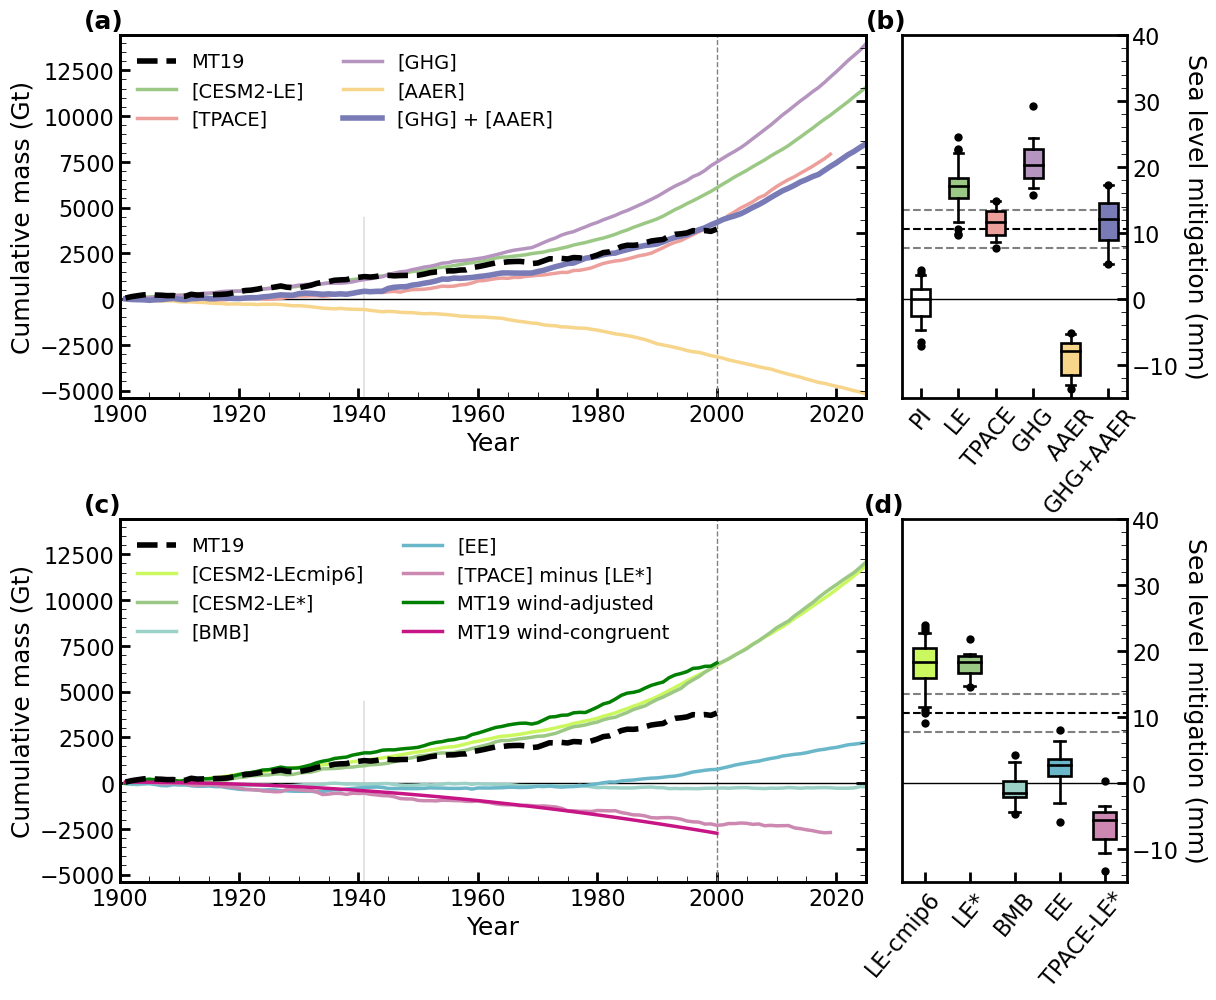

In [37]:
# 
fig = plt.figure(figsize=(13, 11))
gs = GridSpec(11, 12)
plt.rcParams["axes.linewidth"] = 2  # set the value globally

size_tick = 16
size_label = 18
size_legend = 14
size_text = 18
width_line = 2.5
width_box = 1.9

#------------------------------------------------------------------------
# cumulative SMB
ax1 = plt.subplot(gs[0:5,0:9])

plt.axvline(x=1941, ymin=0, ymax=0.5, linestyle="-", color="gray", linewidth=0.3)
plt.axvline(x=2000, linestyle="--", color="gray", linewidth=1)
plt.axhline(y=0, linestyle="-", color="black", linewidth=1)
ax1.plot(SMB_MT_int_yearly_cum.year, SMB_MT_int_yearly_cum, color="black", linestyle="--", linewidth=width_line+1.5, label="MT19", zorder=5)
ax1.plot(SMB_LE_int_yearly_cum.year, SMB_LE_int_yearly_cum, color="#9BC985", linewidth=width_line, label="[CESM2-LE]")
ax1.plot(SMB_TPACE_int_yearly_cum.year, SMB_TPACE_int_yearly_cum, color="#ED9F9B", linewidth=width_line, label="[TPACE]")
ax1.plot(SMB_GHG_int_yearly_cum.year, SMB_GHG_int_yearly_cum, color="#B595BF", linewidth=width_line, label="[GHG]")
ax1.plot(SMB_AAER_int_yearly_cum.year, SMB_AAER_int_yearly_cum, color="#F7D58B", linewidth=width_line, label="[AAER]")
ax1.plot(SMB_GHG_int_yearly_cum.year, (SMB_AAER15_int_yearly_cum+SMB_GHG_int_yearly_cum), color="#797BB7", linewidth=width_line+1.5, label="[GHG] + [AAER]")

ax1.legend(loc="best", frameon=False, prop={"size": size_legend}, ncol=2)

ax1.set_xlim([1900, 2025])
ax1.set_ylim([-15*f09_ocn_area/1e12, 40*f09_ocn_area/1e12])
ax1.set_xlabel("Year", fontsize=size_label)
ax1.set_ylabel("Cumulative mass (Gt)", fontsize=size_label)
ax1.xaxis.set_minor_locator(AutoMinorLocator())
ax1.yaxis.set_minor_locator(AutoMinorLocator())
ax1.tick_params(which="major", length=7, width=2, direction="in")
ax1.tick_params(which="minor", length=4, direction="in")
# ax1.set_yticks([-1000, -500, 0, 500])
ax1.tick_params(labelsize=size_tick)
ax1.text(1894, 14800, '(a)', fontsize=size_text, fontweight='bold')

# SLR contribution
ax2 = ax1.twinx()

ax2.set_ylim([-15, 40])
#ax2.set_ylabel("Sea level offset (mm)", fontsize=size_label)
ax2.yaxis.set_minor_locator(AutoMinorLocator())
ax2.tick_params(which="major", length=7, width=2, direction="in")
ax2.tick_params(which="minor", length=4, direction="in")
ax2.tick_params(labelsize=size_tick, labelcolor='white')

#------------------------------------------------------------------------
# Box plot
ax3 = plt.subplot(gs[0:5,9:12])

data_PI = SMB_PI24seg_ensemble_int_yearly_cum[:,99] *1e12/f09_ocn_area
data_LE = SMB_LE_ensemble_int_yearly_cum[:,99] *1e12/f09_ocn_area
data_GHG = SMB_GHG_ensemble_int_yearly_cum[:,99] *1e12/f09_ocn_area
data_AAER = SMB_AAER_ensemble_int_yearly_cum[:,99] *1e12/f09_ocn_area
data_TPACE = SMB_TPACE_ensemble_int_yearly_cum[:,99] *1e12/f09_ocn_area
data_GHG_AAER = (SMB_GHG_ensemble_int_yearly_cum[:,99] + SMB_AAER_ensemble_int_yearly_cum[:15,99]) *1e12/f09_ocn_area

boxprops = dict(linewidth=width_box)
medianprops = dict(linestyle='-', linewidth=width_box, color='black')
whiskerprops = dict(linewidth=width_box)
capprops = dict(linewidth=width_box)
flierprops = dict(marker='o', markerfacecolor='black', markersize=6, markeredgecolor='none')
plt.axhline(y=0, linestyle="-", color="black", linewidth=1)
plt.axhline(y=SMB_MT_int_yearly_cum.sel(year=2000)*1e12/f09_ocn_area, linestyle="--", color="black", linewidth=1.5)
plt.axhline(y=7.7, linestyle="--", color="gray", linewidth=1.5)#, alpha=0.2)
plt.axhline(y=13.5, linestyle="--", color="gray", linewidth=1.5)#, alpha=0.2)
bplot = ax3.boxplot([data_PI, data_LE, data_TPACE, data_GHG, data_AAER, data_GHG_AAER], whis=[5,95], boxprops=boxprops, medianprops=medianprops, whiskerprops=whiskerprops, capprops=capprops, flierprops=flierprops, patch_artist=True)

# fill with colors
colors = ['white', '#9BC985', "#ED9F9B", '#B595BF', '#F7D58B', "#797BB7"]
for patch, color in zip(bplot['boxes'], colors):
    patch.set_facecolor(color)

ax3.set_ylim([-15, 40])
ax3.yaxis.set_label_position("right")
ax3.set_ylabel("Sea level mitigation (mm)", fontsize=size_label, rotation=-90, labelpad=20)
ax3.set_xticks([1, 2, 3, 4, 5, 6], ['PI', 'LE', '', 'GHG', 'AAER', ''], rotation=50)
ax3.set_xticks([2.83, 5.53], minor=True)
ax3.set_xticklabels(['TPACE', 'GHG+AAER'], minor=True, fontsize=size_tick, rotation=50)
ax3.tick_params(axis='x', which="minor", length=0)

ax3.yaxis.tick_right()
ax3.yaxis.set_minor_locator(AutoMinorLocator())
ax3.tick_params(which="major", length=7, width=2, direction="in")
ax3.tick_params(axis='y', which="minor", length=4, direction="in")
ax3.tick_params(labelsize=size_tick)
ax3.text(-0.46, 14800/f09_ocn_area*1e12, '(b)', fontsize=size_text, fontweight='bold')

#------------------------------------------------------------------------
# cumulative SMB
ax4 = plt.subplot(gs[6:11,0:9])

plt.axvline(x=1941, ymin=0, ymax=0.5, linestyle="-", color="gray", linewidth=0.3)
plt.axvline(x=2000, linestyle="--", color="gray", linewidth=1)
plt.axhline(y=0, linestyle="-", color="black", linewidth=1)
ax4.plot(SMB_MT_int_yearly_cum.year, SMB_MT_int_yearly_cum, color="black", linestyle="--", linewidth=width_line+1.5, label="MT19", zorder=6)
ax4.plot(SMB_LEcmip6_int_yearly_cum.year, SMB_LEcmip6_int_yearly_cum, color="#cbf85f", linewidth=width_line, label="[CESM2-LEcmip6]")
ax4.plot(SMB_LE10_int_yearly_cum.year, SMB_LE10_int_yearly_cum, color="#9BC985", linewidth=width_line, label="[CESM2-LE*]")
ax4.plot(SMB_BMB_int_yearly_cum.year, SMB_BMB_int_yearly_cum, color="#9CD1C8", linewidth=width_line, label="[BMB]")
ax4.plot(SMB_EE_int_yearly_cum.year, SMB_EE_int_yearly_cum, color="#6BB7CA", linewidth=width_line, label="[EE]")
ax4.plot(SMB_TPACE_int_yearly_cum.year, (SMB_TPACE_int_yearly_cum-SMB_LE10_int_yearly_cum), color="#CC88B0", linewidth=width_line, label="[TPACE] minus [LE*]")
ax4.plot(SMB_wind_adjusted_int_yearly_cum.year, SMB_wind_adjusted_int_yearly_cum, color="green", linewidth=width_line, label="MT19 wind-adjusted")
ax4.plot(SMB_wind_congruent_int_yearly_cum.year, SMB_wind_congruent_int_yearly_cum, color="mediumvioletred", linewidth=width_line, label="MT19 wind-congruent")

ax4.legend(loc="best", frameon=False, prop={"size": size_legend}, ncol=2)

ax4.set_xlim([1900, 2025])
ax4.set_ylim([-15*f09_ocn_area/1e12, 40*f09_ocn_area/1e12])
ax4.set_xlabel("Year", fontsize=size_label)
ax4.set_ylabel("Cumulative mass (Gt)", fontsize=size_label)
ax4.xaxis.set_minor_locator(AutoMinorLocator())
ax4.yaxis.set_minor_locator(AutoMinorLocator())
ax4.tick_params(which="major", length=7, width=2, direction="in")
ax4.tick_params(which="minor", length=4, direction="in")
# ax4.set_yticks([-1000, -500, 0, 500])
ax4.tick_params(labelsize=size_tick)
ax4.text(1894, 14800, '(c)', fontsize=size_text, fontweight='bold')

# SLR contribution
ax5 = ax4.twinx()

ax5.set_ylim([-15, 40])
ax5.set_ylabel("Sea level mitigation (mm)", fontsize=size_label)
ax5.yaxis.set_minor_locator(AutoMinorLocator())
ax5.tick_params(which="major", length=7, width=2, direction="in")
ax5.tick_params(which="minor", length=4, direction="in")
ax5.tick_params(labelsize=size_tick, labelcolor='white')

#------------------------------------------------------------------------
# Box plot
ax6 = plt.subplot(gs[6:11,9:12])

data_LEcmip6 = SMB_LEcmip6_ensemble_int_yearly_cum[:,99] *1e12/f09_ocn_area
data_LE10 = SMB_LE10_ensemble_int_yearly_cum[:,99] *1e12/f09_ocn_area
data_BMB = SMB_BMB_ensemble_int_yearly_cum[:,99] *1e12/f09_ocn_area
data_EE = SMB_EE_ensemble_int_yearly_cum[:,99] *1e12/f09_ocn_area
data_TPACE_LE10 = (SMB_TPACE_ensemble_int_yearly_cum[:,99] - SMB_LE10_ensemble_int_yearly_cum[:,99]) *1e12/f09_ocn_area

boxprops = dict(linewidth=width_box)
medianprops = dict(linestyle='-', linewidth=width_box, color='black')
whiskerprops = dict(linewidth=width_box)
capprops = dict(linewidth=width_box)
flierprops = dict(marker='o', markerfacecolor='black', markersize=6, markeredgecolor='none')
plt.axhline(y=0, linestyle="-", color="black", linewidth=1)
plt.axhline(y=SMB_MT_int_yearly_cum.sel(year=2000)*1e12/f09_ocn_area, linestyle="--", color="black", linewidth=1.5)
plt.axhline(y=7.7, linestyle="--", color="gray", linewidth=1.5)#, alpha=0.2)
plt.axhline(y=13.5, linestyle="--", color="gray", linewidth=1.5)#, alpha=0.2)
bplot = ax6.boxplot([data_LEcmip6, data_LE10, data_BMB, data_EE, data_TPACE_LE10], whis=[5,95], boxprops=boxprops, medianprops=medianprops, whiskerprops=whiskerprops, capprops=capprops, flierprops=flierprops, patch_artist=True)

# fill with colors
colors = ["#cbf85f", "#9BC985", "#9CD1C8", "#6BB7CA", "#CC88B0"]
for patch, color in zip(bplot['boxes'], colors):
    patch.set_facecolor(color)

ax6.set_ylim([-15, 40])
ax6.yaxis.set_label_position("right")
ax6.set_ylabel("Sea level mitigation (mm)", fontsize=size_label, rotation=-90, labelpad=20)
ax6.set_xticks([1, 2, 3, 4, 5], ['', 'LE*', 'BMB', 'EE', ''], rotation=50)
ax6.set_xticks([0.53, 4.53], minor=True)
ax6.set_xticklabels(['LE-cmip6', 'TPACE-LE*'], minor=True, fontsize=size_tick, rotation=50)
ax6.tick_params(axis='x', which="minor", length=0)

ax6.yaxis.tick_right()
ax6.yaxis.set_minor_locator(AutoMinorLocator())
ax6.tick_params(which="major", length=7, width=2, direction="in")
ax6.tick_params(axis='y', which="minor", length=4, direction="in")
ax6.tick_params(labelsize=size_tick)
ax6.text(-0.35, 14800/f09_ocn_area*1e12, '(d)', fontsize=size_text, fontweight='bold')


plt.subplots_adjust(wspace=0.7, hspace=1)
plt.savefig(
    "plot/F2_tseries_box_AIS_cumulative_SMB_1901_2025_basePI2_PI24seg_addwind.png",
    dpi=300,
    bbox_inches="tight",
    facecolor="w",
    transparent=False,
)  #

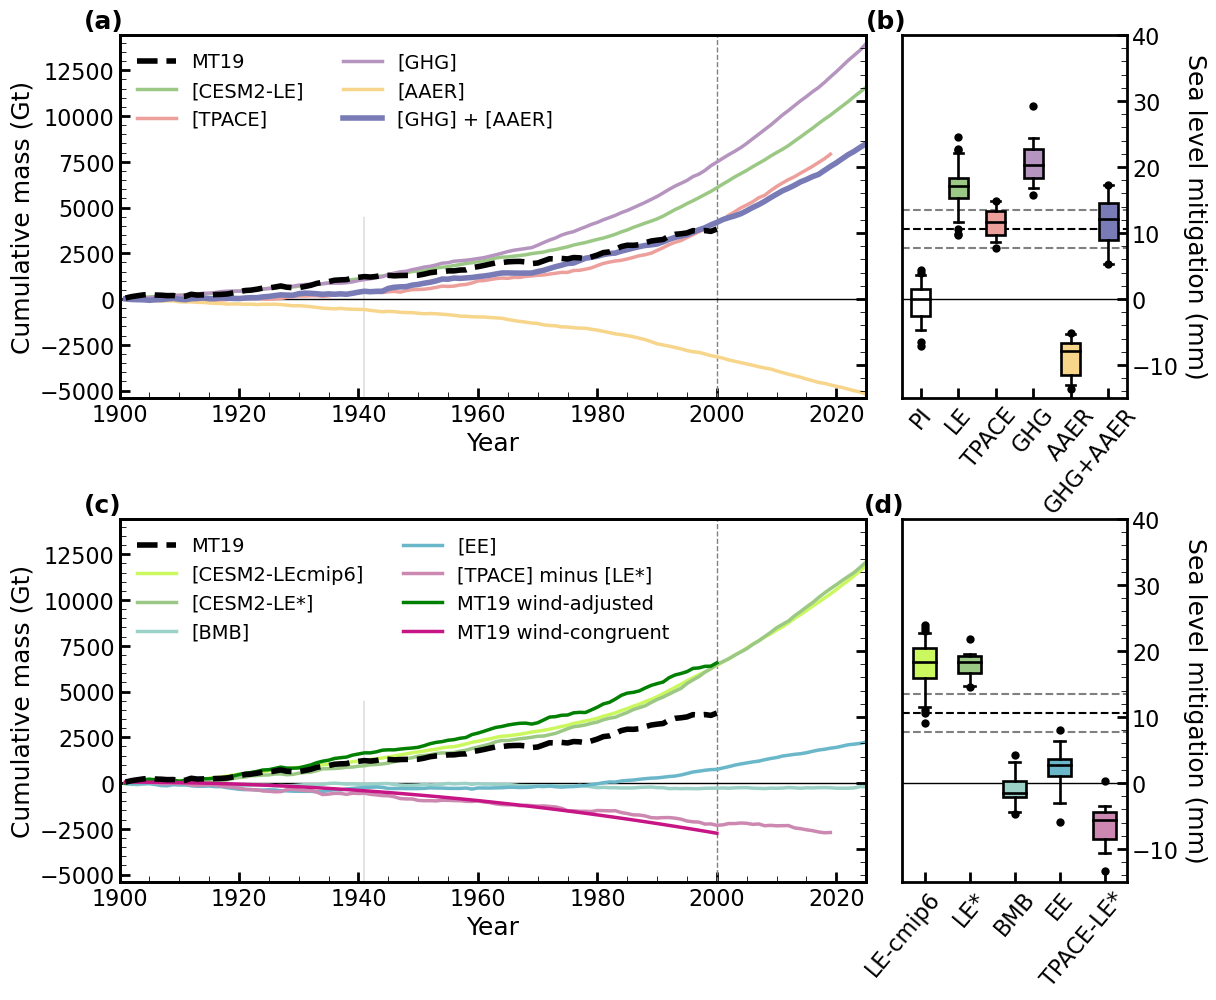

In [38]:
# Save in pdf format
fig = plt.figure(figsize=(13, 11))
gs = GridSpec(11, 12)
plt.rcParams["axes.linewidth"] = 2  # set the value globally

size_tick = 16
size_label = 18
size_legend = 14
size_text = 18
width_line = 2.5
width_box = 1.9

#------------------------------------------------------------------------
# cumulative SMB
ax1 = plt.subplot(gs[0:5,0:9])

plt.axvline(x=1941, ymin=0, ymax=0.5, linestyle="-", color="gray", linewidth=0.3)
plt.axvline(x=2000, linestyle="--", color="gray", linewidth=1)
plt.axhline(y=0, linestyle="-", color="black", linewidth=1)
ax1.plot(SMB_MT_int_yearly_cum.year, SMB_MT_int_yearly_cum, color="black", linestyle="--", linewidth=width_line+1.5, label="MT19", zorder=5)
ax1.plot(SMB_LE_int_yearly_cum.year, SMB_LE_int_yearly_cum, color="#9BC985", linewidth=width_line, label="[CESM2-LE]")
ax1.plot(SMB_TPACE_int_yearly_cum.year, SMB_TPACE_int_yearly_cum, color="#ED9F9B", linewidth=width_line, label="[TPACE]")
ax1.plot(SMB_GHG_int_yearly_cum.year, SMB_GHG_int_yearly_cum, color="#B595BF", linewidth=width_line, label="[GHG]")
ax1.plot(SMB_AAER_int_yearly_cum.year, SMB_AAER_int_yearly_cum, color="#F7D58B", linewidth=width_line, label="[AAER]")
ax1.plot(SMB_GHG_int_yearly_cum.year, (SMB_AAER15_int_yearly_cum+SMB_GHG_int_yearly_cum), color="#797BB7", linewidth=width_line+1.5, label="[GHG] + [AAER]")

ax1.legend(loc="best", frameon=False, prop={"size": size_legend}, ncol=2)

ax1.set_xlim([1900, 2025])
ax1.set_ylim([-15*f09_ocn_area/1e12, 40*f09_ocn_area/1e12])
ax1.set_xlabel("Year", fontsize=size_label)
ax1.set_ylabel("Cumulative mass (Gt)", fontsize=size_label)
ax1.xaxis.set_minor_locator(AutoMinorLocator())
ax1.yaxis.set_minor_locator(AutoMinorLocator())
ax1.tick_params(which="major", length=7, width=2, direction="in")
ax1.tick_params(which="minor", length=4, direction="in")
# ax1.set_yticks([-1000, -500, 0, 500])
ax1.tick_params(labelsize=size_tick)
ax1.text(1894, 14800, '(a)', fontsize=size_text, fontweight='bold')

# SLR contribution
ax2 = ax1.twinx()

ax2.set_ylim([-15, 40])
#ax2.set_ylabel("Sea level offset (mm)", fontsize=size_label)
ax2.yaxis.set_minor_locator(AutoMinorLocator())
ax2.tick_params(which="major", length=7, width=2, direction="in")
ax2.tick_params(which="minor", length=4, direction="in")
ax2.tick_params(labelsize=size_tick, labelcolor='white')

#------------------------------------------------------------------------
# Box plot
ax3 = plt.subplot(gs[0:5,9:12])

data_PI = SMB_PI24seg_ensemble_int_yearly_cum[:,99] *1e12/f09_ocn_area
data_LE = SMB_LE_ensemble_int_yearly_cum[:,99] *1e12/f09_ocn_area
data_GHG = SMB_GHG_ensemble_int_yearly_cum[:,99] *1e12/f09_ocn_area
data_AAER = SMB_AAER_ensemble_int_yearly_cum[:,99] *1e12/f09_ocn_area
data_TPACE = SMB_TPACE_ensemble_int_yearly_cum[:,99] *1e12/f09_ocn_area
data_GHG_AAER = (SMB_GHG_ensemble_int_yearly_cum[:,99] + SMB_AAER_ensemble_int_yearly_cum[:15,99]) *1e12/f09_ocn_area

boxprops = dict(linewidth=width_box)
medianprops = dict(linestyle='-', linewidth=width_box, color='black')
whiskerprops = dict(linewidth=width_box)
capprops = dict(linewidth=width_box)
flierprops = dict(marker='o', markerfacecolor='black', markersize=6, markeredgecolor='none')
plt.axhline(y=0, linestyle="-", color="black", linewidth=1)
plt.axhline(y=SMB_MT_int_yearly_cum.sel(year=2000)*1e12/f09_ocn_area, linestyle="--", color="black", linewidth=1.5)
plt.axhline(y=7.7, linestyle="--", color="gray", linewidth=1.5)#, alpha=0.2)
plt.axhline(y=13.5, linestyle="--", color="gray", linewidth=1.5)#, alpha=0.2)
bplot = ax3.boxplot([data_PI, data_LE, data_TPACE, data_GHG, data_AAER, data_GHG_AAER], whis=[5,95], boxprops=boxprops, medianprops=medianprops, whiskerprops=whiskerprops, capprops=capprops, flierprops=flierprops, patch_artist=True)

# fill with colors
colors = ['white', '#9BC985', "#ED9F9B", '#B595BF', '#F7D58B', "#797BB7"]
for patch, color in zip(bplot['boxes'], colors):
    patch.set_facecolor(color)

ax3.set_ylim([-15, 40])
ax3.yaxis.set_label_position("right")
ax3.set_ylabel("Sea level mitigation (mm)", fontsize=size_label, rotation=-90, labelpad=20)
ax3.set_xticks([1, 2, 3, 4, 5, 6], ['PI', 'LE', '', 'GHG', 'AAER', ''], rotation=50)
ax3.set_xticks([2.83, 5.53], minor=True)
ax3.set_xticklabels(['TPACE', 'GHG+AAER'], minor=True, fontsize=size_tick, rotation=50)
ax3.tick_params(axis='x', which="minor", length=0)

ax3.yaxis.tick_right()
ax3.yaxis.set_minor_locator(AutoMinorLocator())
ax3.tick_params(which="major", length=7, width=2, direction="in")
ax3.tick_params(axis='y', which="minor", length=4, direction="in")
ax3.tick_params(labelsize=size_tick)
ax3.text(-0.46, 14800/f09_ocn_area*1e12, '(b)', fontsize=size_text, fontweight='bold')

#------------------------------------------------------------------------
# cumulative SMB
ax4 = plt.subplot(gs[6:11,0:9])

plt.axvline(x=1941, ymin=0, ymax=0.5, linestyle="-", color="gray", linewidth=0.3)
plt.axvline(x=2000, linestyle="--", color="gray", linewidth=1)
plt.axhline(y=0, linestyle="-", color="black", linewidth=1)
ax4.plot(SMB_MT_int_yearly_cum.year, SMB_MT_int_yearly_cum, color="black", linestyle="--", linewidth=width_line+1.5, label="MT19", zorder=6)
ax4.plot(SMB_LEcmip6_int_yearly_cum.year, SMB_LEcmip6_int_yearly_cum, color="#cbf85f", linewidth=width_line, label="[CESM2-LEcmip6]")
ax4.plot(SMB_LE10_int_yearly_cum.year, SMB_LE10_int_yearly_cum, color="#9BC985", linewidth=width_line, label="[CESM2-LE*]")
ax4.plot(SMB_BMB_int_yearly_cum.year, SMB_BMB_int_yearly_cum, color="#9CD1C8", linewidth=width_line, label="[BMB]")
ax4.plot(SMB_EE_int_yearly_cum.year, SMB_EE_int_yearly_cum, color="#6BB7CA", linewidth=width_line, label="[EE]")
ax4.plot(SMB_TPACE_int_yearly_cum.year, (SMB_TPACE_int_yearly_cum-SMB_LE10_int_yearly_cum), color="#CC88B0", linewidth=width_line, label="[TPACE] minus [LE*]")
ax4.plot(SMB_wind_adjusted_int_yearly_cum.year, SMB_wind_adjusted_int_yearly_cum, color="green", linewidth=width_line, label="MT19 wind-adjusted")
ax4.plot(SMB_wind_congruent_int_yearly_cum.year, SMB_wind_congruent_int_yearly_cum, color="mediumvioletred", linewidth=width_line, label="MT19 wind-congruent")

ax4.legend(loc="best", frameon=False, prop={"size": size_legend}, ncol=2)

ax4.set_xlim([1900, 2025])
ax4.set_ylim([-15*f09_ocn_area/1e12, 40*f09_ocn_area/1e12])
ax4.set_xlabel("Year", fontsize=size_label)
ax4.set_ylabel("Cumulative mass (Gt)", fontsize=size_label)
ax4.xaxis.set_minor_locator(AutoMinorLocator())
ax4.yaxis.set_minor_locator(AutoMinorLocator())
ax4.tick_params(which="major", length=7, width=2, direction="in")
ax4.tick_params(which="minor", length=4, direction="in")
# ax4.set_yticks([-1000, -500, 0, 500])
ax4.tick_params(labelsize=size_tick)
ax4.text(1894, 14800, '(c)', fontsize=size_text, fontweight='bold')

# SLR contribution
ax5 = ax4.twinx()

ax5.set_ylim([-15, 40])
ax5.set_ylabel("Sea level mitigation (mm)", fontsize=size_label)
ax5.yaxis.set_minor_locator(AutoMinorLocator())
ax5.tick_params(which="major", length=7, width=2, direction="in")
ax5.tick_params(which="minor", length=4, direction="in")
ax5.tick_params(labelsize=size_tick, labelcolor='white')

#------------------------------------------------------------------------
# Box plot
ax6 = plt.subplot(gs[6:11,9:12])

data_LEcmip6 = SMB_LEcmip6_ensemble_int_yearly_cum[:,99] *1e12/f09_ocn_area
data_LE10 = SMB_LE10_ensemble_int_yearly_cum[:,99] *1e12/f09_ocn_area
data_BMB = SMB_BMB_ensemble_int_yearly_cum[:,99] *1e12/f09_ocn_area
data_EE = SMB_EE_ensemble_int_yearly_cum[:,99] *1e12/f09_ocn_area
data_TPACE_LE10 = (SMB_TPACE_ensemble_int_yearly_cum[:,99] - SMB_LE10_ensemble_int_yearly_cum[:,99]) *1e12/f09_ocn_area

boxprops = dict(linewidth=width_box)
medianprops = dict(linestyle='-', linewidth=width_box, color='black')
whiskerprops = dict(linewidth=width_box)
capprops = dict(linewidth=width_box)
flierprops = dict(marker='o', markerfacecolor='black', markersize=6, markeredgecolor='none')
plt.axhline(y=0, linestyle="-", color="black", linewidth=1)
plt.axhline(y=SMB_MT_int_yearly_cum.sel(year=2000)*1e12/f09_ocn_area, linestyle="--", color="black", linewidth=1.5)
plt.axhline(y=7.7, linestyle="--", color="gray", linewidth=1.5)#, alpha=0.2)
plt.axhline(y=13.5, linestyle="--", color="gray", linewidth=1.5)#, alpha=0.2)
bplot = ax6.boxplot([data_LEcmip6, data_LE10, data_BMB, data_EE, data_TPACE_LE10], whis=[5,95], boxprops=boxprops, medianprops=medianprops, whiskerprops=whiskerprops, capprops=capprops, flierprops=flierprops, patch_artist=True)

# fill with colors
colors = ["#cbf85f", "#9BC985", "#9CD1C8", "#6BB7CA", "#CC88B0"]
for patch, color in zip(bplot['boxes'], colors):
    patch.set_facecolor(color)

ax6.set_ylim([-15, 40])
ax6.yaxis.set_label_position("right")
ax6.set_ylabel("Sea level mitigation (mm)", fontsize=size_label, rotation=-90, labelpad=20)
ax6.set_xticks([1, 2, 3, 4, 5], ['', 'LE*', 'BMB', 'EE', ''], rotation=50)
ax6.set_xticks([0.53, 4.53], minor=True)
ax6.set_xticklabels(['LE-cmip6', 'TPACE-LE*'], minor=True, fontsize=size_tick, rotation=50)
ax6.tick_params(axis='x', which="minor", length=0)

ax6.yaxis.tick_right()
ax6.yaxis.set_minor_locator(AutoMinorLocator())
ax6.tick_params(which="major", length=7, width=2, direction="in")
ax6.tick_params(axis='y', which="minor", length=4, direction="in")
ax6.tick_params(labelsize=size_tick)
ax6.text(-0.35, 14800/f09_ocn_area*1e12, '(d)', fontsize=size_text, fontweight='bold')


plt.subplots_adjust(wspace=0.7, hspace=1)
plt.savefig(
    "plot/F2_tseries_box_AIS_cumulative_SMB_1901_2025_basePI2_PI24seg_addwind.pdf",
    bbox_inches="tight",
    facecolor="w",
    transparent=False,
)